## Изучение данных из файла

In [1]:
# загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загружаем датасет
try:
    data = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/3. Исследовательский анализ данных/real_estate_data.csv', \
        sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# фунция для получения общей информации о датасетах
def get_info(df, df_name):
    print(f'Общая информация о таблице - {df_name}')
    display(df.tail()) # выводим "голову" таблицы
    print('*'*50)
    print(df.info() , '\n') # общую информацию
    print('*'*50)
    print(df.columns, '\n') # названия столбцов
    print('*'*50)
    print(df.describe(),'\n') # числовое описание
    print('*'*50)
    print(f'Число дубликатов в таблице - {df_name}', '\n') 
    print(df.duplicated().sum()) # количество дубликатов

In [4]:
# вызваем функцию
get_info(data, 'rest_data')

Общая информация о таблице - rest_data


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name      

### Вывод

В таблице 22 столбца. Тип данных:

* bool - 2 столбца, 
* float64 - 14 стоблцов, 
* int64 - 3 столбца, 
* object - 3 столбца.

В каждой строке таблицы — данные о квартире. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Предварительно можно утверждать, что, данных достаточно для проверки гипотез. 

Но встречаются проблемы с данными:

* Есть пропущенные значения в столбцах
* Смешаный регистр в названии столбца 
* Некачественные названия столбцов
* Нелогичная группировка столбцов между собой
* Некорректные типы данных

## Предобработка данных

In [5]:
# Приведем названия столбцов в порядок, поработаем с признаками
data = data.rename(columns={'airports_nearest': 'airport_distance_m',
                            'cityCenters_nearest': 'city_center_distance_m',
                            'parks_nearest': 'park_distance_m',
                            'ponds_nearest': 'pond_distance_m',
                            'ceiling_height': 'ceiling_height_m',
                            'kitchen_area': 'kitchen_area_m2',
                            'living_area': 'living_area_m2',
                            'total_area': 'total_area_m2',
                            'locality_name': 'town_name',
                            'open_plan': 'is_open_plan',
                            'studio': 'is_studio',
                            'parks_around3000': 'qt_parks_around_3km',
                            'ponds_around3000': 'qt_ponds_around_3km',                                                                               
                            'balcony': 'qt_balconies',
                            'rooms': 'qt_rooms'})

data.head()

,total_images,last_price,total_area_m2,first_day_exposition,qt_rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,kitchen_area_m2,qt_balconies,town_name,airport_distance_m,city_center_distance_m,qt_parks_around_3km,park_distance_m,qt_ponds_around_3km,pond_distance_m,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Названия стали понятнее, а таблица нагляднее.

In [6]:
# Поменяем логику столбцов на более человечную: где, что, почем, когда и все о парках, водоемах и аэропортах
data = data[[
 'town_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'qt_rooms',
 'qt_balconies',
 'floor',
 'floors_total',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'airport_distance_m',
 'qt_parks_around_3km',
 'park_distance_m',
 'qt_ponds_around_3km',
 'pond_distance_m'
]]
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,airport_distance_m,qt_parks_around_3km,park_distance_m,qt_ponds_around_3km,pond_distance_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


Теперь метры с метрами, а пруды с парками

In [7]:
# Посмотрим пропуски
data.isna().sum().sort_values()

is_studio                     0
total_area_m2                 0
first_day_exposition          0
last_price                    0
total_images                  0
qt_rooms                      0
is_open_plan                  0
floor                         0
town_name                    49
floors_total                 86
living_area_m2             1903
kitchen_area_m2            2278
days_exposition            3181
qt_ponds_around_3km        5518
qt_parks_around_3km        5518
city_center_distance_m     5519
airport_distance_m         5542
ceiling_height_m           9195
qt_balconies              11519
pond_distance_m           14589
park_distance_m           15620
is_apartment              20924
dtype: int64

In [8]:
# Посмотрим теперь в процентах
data.isna().sum().sort_values()/data.shape[0]*100

is_studio                  0.000000
total_area_m2              0.000000
first_day_exposition       0.000000
last_price                 0.000000
total_images               0.000000
qt_rooms                   0.000000
is_open_plan               0.000000
floor                      0.000000
town_name                  0.206760
floors_total               0.362885
living_area_m2             8.029875
kitchen_area_m2            9.612220
days_exposition           13.422507
qt_ponds_around_3km       23.283683
qt_parks_around_3km       23.283683
city_center_distance_m    23.287902
airport_distance_m        23.384953
ceiling_height_m          38.799105
qt_balconies              48.605426
pond_distance_m           61.559559
park_distance_m           65.909954
is_apartment              88.290645
dtype: float64

Пропуски выглядят некритично, люди могут не знать высоту потолков. Данные, которые должны подтягиваться с карты автоматически (например, расстояние до центра, аэропорта, ближайшего парка и водоёма) в среднем не прогружаются в 23%. Этот процент увеличивается на уточняющих позициях (23% не нашел парк в 3км, и в 65% не определит ближайший парк). 

In [9]:
# Заполним пропуски. Начнем с города

len(data['town_name'].unique())

365

In [10]:
# Много городков, посмотрим что будет, если изменить регистр букв

data['town_name'] = data['town_name'].str.lower()
len(data['town_name'].unique()) # не сработало

365

In [11]:
# смотрим уникальные города
data['town_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Возникла проблема с буквой "Ё". Может есть ПГТ и деревня с одним названием, а может это дубли.

In [12]:
# заменяем "ё" на "е" и считаем города
data['town_name'] = data['town_name'].str.replace('ё', 'е', regex=True)
len(data['town_name'].unique())

331

Убрали 34 дубля.

In [13]:
# ищем пропуски в названиях городов
data['town_name'].isna().sum()

49

Из 23699 квартир 49 без названия города. Удалим эти строки, они будут мешать в анализе и даже пользователям такие объявления не нужны, не понятно, где эта квартира.

In [14]:
# удаляем объявления без адреса
data = data.dropna(subset=['town_name'])
data['town_name'].isna().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   town_name               23650 non-null  object 
 1   total_area_m2           23650 non-null  float64
 2   living_area_m2          21752 non-null  float64
 3   kitchen_area_m2         21381 non-null  float64
 4   ceiling_height_m        14490 non-null  float64
 5   qt_rooms                23650 non-null  int64  
 6   qt_balconies            12137 non-null  float64
 7   floor                   23650 non-null  int64  
 8   floors_total            23565 non-null  float64
 9   is_apartment            2760 non-null   object 
 10  is_studio               23650 non-null  bool   
 11  is_open_plan            23650 non-null  bool   
 12  total_images            23650 non-null  int64  
 13  last_price              23650 non-null  float64
 14  first_day_exposition    23650 non-null

In [16]:
# Разберемся со статусами студии, апартаментов и открытой планировки

data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
# считаем аппартаменты
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [18]:
# заполняем пропуски отрицанием
data['is_apartment'] = data['is_apartment'].fillna(False)
# проверяем заполнение
data['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   town_name               23650 non-null  object 
 1   total_area_m2           23650 non-null  float64
 2   living_area_m2          21752 non-null  float64
 3   kitchen_area_m2         21381 non-null  float64
 4   ceiling_height_m        14490 non-null  float64
 5   qt_rooms                23650 non-null  int64  
 6   qt_balconies            12137 non-null  float64
 7   floor                   23650 non-null  int64  
 8   floors_total            23565 non-null  float64
 9   is_apartment            23650 non-null  bool   
 10  is_studio               23650 non-null  bool   
 11  is_open_plan            23650 non-null  bool   
 12  total_images            23650 non-null  int64  
 13  last_price              23650 non-null  float64
 14  first_day_exposition    23650 non-null

Заполнили пропуски в столбце "Апартаменты" и привели его к булевому значению. Этим немного сократили нагрузку на память и привели все столбцы с похожим типом значений к единому стилю в таблице.

In [20]:
# Посмотрим на балконы
data['qt_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [21]:
# считаем квартиры по числу балконов
data['qt_balconies'].value_counts().sort_values()

3.0      81
4.0     182
5.0     304
2.0    3658
0.0    3725
1.0    4187
Name: qt_balconies, dtype: int64

Балконы пропущены чуть меньше, чем в половине случаев. Их может или не быть или продавец не хотел их заполнить. 4 и 5 балконов похоже на выброс, но такие квартиры существуют, а их процент не велик. Метод .value_counts() показал тип данных int64, однако, data.info() сообщает, что тип данных float64. Не будем заполнять пропуски, меняем тип данных на int64 - все равно продаем с целым балконом

In [22]:
# Посчитаем медианные значения для жилой площади в зависимости от числа комнат в квартире
print('Пропуски до:', data['living_area_m2'].isna().sum())
for room in data['qt_rooms'].unique():
    median = data.loc[data['qt_rooms'] == room, 'living_area_m2'].median()
    print(room, median)
    data.loc[(data['living_area_m2'].isna()) & (data['qt_rooms'] == room), 'living_area_m2'] = median
print('Пропуски после:', data['living_area_m2'].isna().sum())

Пропуски до: 1898
3 45.0
1 17.6
2 30.5
4 63.8
5 91.785
6 123.9
0 18.0
7 145.0
11 133.9
8 161.0
14 195.15
10 161.4
15 409.0
9 179.2
19 264.5
16 180.0
12 409.7
Пропуски после: 0


In [23]:
# Заменим нулевые значения квартир на числовые в зависимости от жилой площади квартиры

def category(row):
    if row['qt_rooms'] > 0: return -1 # все у кого не 0
    if 5 <= row['living_area_m2'] and row['living_area_m2'] < 30.5:
        return 1
    if 30.5 <= row['living_area_m2'] and row['living_area_m2'] < 45.0:
        return 2
    if 45.0 <= row['living_area_m2'] and row['living_area_m2'] < 63.8:
        return 3
    return 4  

В данных о количестве комнат нет пропусков в привычном их понимании. Есть нулевые значения. Скорее всего, они возникли из-за возможности у пользователя не заполнять количество комнат - эта графа могла быть не обязательной в форме.

In [24]:
# добавляем столбец, в который функция вернет число комнат для пропусков
data['test'] = data.apply(category, axis = 1) # применяется к ряду целиком
data[['test', 'qt_rooms', 'living_area_m2']].query('test == 1')

,test,qt_rooms,living_area_m2
144,1,0,15.50
349,1,0,17.00
440,1,0,24.75
508,1,0,24.30
608,1,0,18.00
...,...,...,...
23210,1,0,18.00
23442,1,0,18.00
23554,1,0,18.00
23592,1,0,18.00


In [25]:
# заменим нули в количестве комнат на количество комнат, рассчитаное по площади
data.loc[(data['qt_rooms'] == 0) & (data['test'] != -1),'qt_rooms'] = data['test']

In [26]:
# проверим как изменилось число комнат
data['qt_rooms'].describe()

count    23650.000000
mean         2.078943
std          1.066435
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: qt_rooms, dtype: float64

В минимальном значение стоит 1, значит нулевые значения заполнены

In [27]:
# как заполнились нулевые значения
data[['test', 'living_area_m2', 'qt_rooms']].query('test != -1').head()

,test,living_area_m2,qt_rooms
144,1,15.50,1
349,1,17.00,1
440,1,24.75,1
508,1,24.30,1
608,1,18.00,1


Значения заполнены

In [28]:
# возникли ли изменения в указанных комнатах
data[['test', 'living_area_m2', 'qt_rooms']].query('test == -1').head()

,test,living_area_m2,qt_rooms
0,-1,51.0,3
1,-1,18.6,1
2,-1,34.3,2
3,-1,45.0,3
4,-1,32.0,2


Указанное в объявлених число комнат не изменилось

In [29]:
# теперь ко дню публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,last_price,first_day_exposition,days_exposition,city_center_distance_m,airport_distance_m,qt_parks_around_3km,park_distance_m,qt_ponds_around_3km,pond_distance_m,test
0,санкт-петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,...,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,-1
1,поселок шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,False,...,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,-1
2,санкт-петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,False,...,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,-1
3,санкт-петербург,159.0,45.0,NaN,NaN,3,0.0,9,14.0,False,...,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,-1
4,санкт-петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,-1


Заменили текстовый тип ячейки на датовый. Теперь можно вывести из этих строк день недели, месяц и год публикации объявления.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   town_name               23650 non-null  object        
 1   total_area_m2           23650 non-null  float64       
 2   living_area_m2          23650 non-null  float64       
 3   kitchen_area_m2         21381 non-null  float64       
 4   ceiling_height_m        14490 non-null  float64       
 5   qt_rooms                23650 non-null  int64         
 6   qt_balconies            12137 non-null  float64       
 7   floor                   23650 non-null  int64         
 8   floors_total            23565 non-null  float64       
 9   is_apartment            23650 non-null  bool          
 10  is_studio               23650 non-null  bool          
 11  is_open_plan            23650 non-null  bool          
 12  total_images            23650 non-null  int64 

In [31]:
# Уберем метры из столбцов с прудами, аэропортами и центрами городам, приведем все к километрам

data['city_center_distance_km'] = data['city_center_distance_m'] / 1000
data['airport_distance_km'] = data['airport_distance_m'] / 1000
data['park_distance_km'] = data['park_distance_m'] / 1000
data['pond_distance_km'] = data['pond_distance_m'] / 1000

Перезаписали в новый столбец.

In [32]:
del data['city_center_distance_m']
del data['airport_distance_m']
del data['park_distance_m']
del data['pond_distance_m']

Удалили столбец с метрами.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   town_name                23650 non-null  object        
 1   total_area_m2            23650 non-null  float64       
 2   living_area_m2           23650 non-null  float64       
 3   kitchen_area_m2          21381 non-null  float64       
 4   ceiling_height_m         14490 non-null  float64       
 5   qt_rooms                 23650 non-null  int64         
 6   qt_balconies             12137 non-null  float64       
 7   floor                    23650 non-null  int64         
 8   floors_total             23565 non-null  float64       
 9   is_apartment             23650 non-null  bool          
 10  is_studio                23650 non-null  bool          
 11  is_open_plan             23650 non-null  bool          
 12  total_images             23650 n

Осталось большое количество пропусков в высоте потолков. Вероятно, этот параметр был не обязателен при публикации объявления. Строительство, в основном, типовое, поэтому одинаковые дома обладают схожими характеристиками. Поскольку у нас нет данных о сериях домов и типе постройки, например: "сталинка", "хрущевка", "новострой", невозможно категоризировать данные и заполнить типовыми значениями. Будем рассчитывать медиану и заполнять ей.

In [34]:
# Посчитаем медианные значения для потолков по квартирам
# к черту дисперсию, к черту чистую выборку
print('Пропуски до:', data['ceiling_height_m'].isna().sum())
data['ceiling_height_m'] = data['ceiling_height_m'].fillna(data['ceiling_height_m'].median())
print('Пропуски после:', data['ceiling_height_m'].isna().sum())

Пропуски до: 9160
Пропуски после: 0


In [35]:
data.head(10)

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,last_price,first_day_exposition,days_exposition,qt_parks_around_3km,qt_ponds_around_3km,test,city_center_distance_km,airport_distance_km,park_distance_km,pond_distance_km
0,санкт-петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.0,False,...,13000000.0,2019-03-07,NaN,1.0,2.0,-1,16.028,18.863,0.482,0.755
1,поселок шушары,40.40,18.60,11.00,2.65,1,2.0,1,11.0,False,...,3350000.0,2018-12-04,81.0,0.0,0.0,-1,18.603,12.817,NaN,NaN
2,санкт-петербург,56.00,34.30,8.30,2.65,2,0.0,4,5.0,False,...,5196000.0,2015-08-20,558.0,1.0,2.0,-1,13.933,21.741,0.090,0.574
3,санкт-петербург,159.00,45.00,NaN,2.65,3,0.0,9,14.0,False,...,64900000.0,2015-07-24,424.0,2.0,3.0,-1,6.800,28.098,0.084,0.234
4,санкт-петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.0,False,...,10000000.0,2018-06-19,121.0,2.0,1.0,-1,8.098,31.856,0.112,0.048
5,городской поселок янино-1,30.40,14.40,9.10,2.65,1,NaN,5,12.0,False,...,2890000.0,2018-09-10,55.0,NaN,NaN,-1,NaN,NaN,NaN,NaN
6,поселок парголово,37.30,10.60,14.40,2.65,1,1.0,6,26.0,False,...,3700000.0,2017-11-02,155.0,0.0,0.0,-1,19.143,52.996,NaN,NaN
7,санкт-петербург,71.60,30.50,18.90,2.65,2,2.0,22,24.0,False,...,7915000.0,2019-04-18,NaN,0.0,0.0,-1,11.634,23.982,NaN,NaN
8,поселок мурино,33.16,15.43,8.81,2.65,1,NaN,26,27.0,False,...,2900000.0,2018-05-23,189.0,NaN,NaN,-1,NaN,NaN,NaN,NaN
9,санкт-петербург,61.00,43.60,6.50,2.50,3,2.0,7,9.0,False,...,5400000.0,2017-02-26,289.0,0.0,0.0,-1,15.008,50.898,NaN,NaN


### Вывод

Во время педобработки данных:

* Исправлены некачественные названия столбцов, чтобы они явно передавали значение данных
* Перегруппированы столбцы таблицы по читаемости человеческой логики
* Изменины некорректные типы данных из object в  bool, а так же из object в datetime64[ns]
* Определены пропущенные значения
* Заполнены пропущенные значения
* Есть пояснение, какие пропущенные значения обнаружены
* Изменены типы данных
* Есть пояснение, в каких столбцах изменены типы и почему

## Расчёты и добавление результатов в таблицу

In [36]:
# Добавим цену квадратного метра
# Для удобства просмотра таблицы переведем деньгив миллионы
data['last_price_mln'] = data['last_price'] / 1000000
data['last_price_mln'] = data['last_price_mln'].round(2)
data['price_per_meter_mln'] = data['last_price_mln'] / data['total_area_m2']
data['price_per_meter_mln'] = data['price_per_meter_mln'].round(2)
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,days_exposition,qt_parks_around_3km,qt_ponds_around_3km,test,city_center_distance_km,airport_distance_km,park_distance_km,pond_distance_km,last_price_mln,price_per_meter_mln
0,санкт-петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,...,NaN,1.0,2.0,-1,16.028,18.863,0.482,0.755,13.00,0.12
1,поселок шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,81.0,0.0,0.0,-1,18.603,12.817,NaN,NaN,3.35,0.08
2,санкт-петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,558.0,1.0,2.0,-1,13.933,21.741,0.090,0.574,5.20,0.09
3,санкт-петербург,159.0,45.0,NaN,2.65,3,0.0,9,14.0,False,...,424.0,2.0,3.0,-1,6.800,28.098,0.084,0.234,64.90,0.41
4,санкт-петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,121.0,2.0,1.0,-1,8.098,31.856,0.112,0.048,10.00,0.10


In [37]:
# уберем лишний столбец
del data['last_price']

In [38]:
# проверим что получилось
data.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,total_images,days_exposition,qt_parks_around_3km,qt_ponds_around_3km,test,city_center_distance_km,airport_distance_km,park_distance_km,pond_distance_km,last_price_mln,price_per_meter_mln
count,23650.000000,23650.000000,21381.000000,23650.000000,23650.000000,12137.000000,23650.000000,23565.000000,23650.000000,20470.000000,18140.000000,18140.000000,23650.000000,18139.000000,18116.000000,8064.000000,9085.000000,23650.000000,23650.000000
mean,60.329069,34.313891,10.566403,2.724311,2.078943,1.153003,5.893277,10.675875,9.862326,180.753200,0.611577,0.769680,-0.982833,14.197861,28.803226,0.490831,0.518060,6.541175,0.099462
std,35.661808,21.709506,5.901753,0.989255,1.066435,1.071169,4.883317,6.594823,5.682278,219.777916,0.802003,0.937948,0.190367,8.606830,12.637314,0.342554,0.277842,10.896397,0.050404
min,12.000000,2.000000,1.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.181000,0.000000,0.001000,0.013000,0.010000,0.000000
25%,40.000000,18.400000,7.000000,2.600000,1.000000,0.000000,2.000000,5.000000,6.000000,45.000000,0.000000,0.000000,-1.000000,9.241000,18.575750,0.288000,0.293000,3.400000,0.080000
50%,52.000000,30.300000,9.100000,2.650000,2.000000,1.000000,4.000000,9.000000,9.000000,95.000000,0.000000,1.000000,-1.000000,13.105000,26.756500,0.454500,0.502000,4.650000,0.100000
75%,69.700000,42.700000,12.000000,2.700000,3.000000,2.000000,8.000000,16.000000,14.000000,231.000000,1.000000,1.000000,-1.000000,16.293000,37.294000,0.612000,0.730000,6.800000,0.110000
max,900.000000,409.700000,112.000000,100.000000,19.000000,5.000000,33.000000,60.000000,50.000000,1580.000000,3.000000,3.000000,4.000000,65.968000,84.869000,3.190000,1.344000,763.000000,1.910000


Добавили в таблицу столбец с рассчитанной ценой квадратного метра

In [39]:
# Добавим столбцы c днем, месяцем и годом публикации
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,test,city_center_distance_km,airport_distance_km,park_distance_km,pond_distance_km,last_price_mln,price_per_meter_mln,day_of_week_exposition,month_exposition,year_exposition
0,санкт-петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,...,-1,16.028,18.863,0.482,0.755,13.00,0.12,Thursday,March,2019
1,поселок шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,-1,18.603,12.817,NaN,NaN,3.35,0.08,Tuesday,December,2018
2,санкт-петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,-1,13.933,21.741,0.090,0.574,5.20,0.09,Thursday,August,2015
3,санкт-петербург,159.0,45.0,NaN,2.65,3,0.0,9,14.0,False,...,-1,6.800,28.098,0.084,0.234,64.90,0.41,Friday,July,2015
4,санкт-петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,-1,8.098,31.856,0.112,0.048,10.00,0.10,Tuesday,June,2018


Рассчитали и добавили в таблицу день, месяц и год публикации

In [40]:
# Добавим этажи
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_status'] = data.apply(floor_status, axis=1)
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,city_center_distance_km,airport_distance_km,park_distance_km,pond_distance_km,last_price_mln,price_per_meter_mln,day_of_week_exposition,month_exposition,year_exposition,floor_status
0,санкт-петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,...,16.028,18.863,0.482,0.755,13.00,0.12,Thursday,March,2019,другой
1,поселок шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,18.603,12.817,NaN,NaN,3.35,0.08,Tuesday,December,2018,первый
2,санкт-петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,13.933,21.741,0.090,0.574,5.20,0.09,Thursday,August,2015,другой
3,санкт-петербург,159.0,45.0,NaN,2.65,3,0.0,9,14.0,False,...,6.800,28.098,0.084,0.234,64.90,0.41,Friday,July,2015,другой
4,санкт-петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,8.098,31.856,0.112,0.048,10.00,0.10,Tuesday,June,2018,другой


После группировки данные разделели на три категории по типу этажа и внесли в таблицу.

In [41]:
data['total_living_area_ratio'] = data['living_area_m2'] / data['total_area_m2']
data['total_kitchen_area_ratio'] = data['kitchen_area_m2'] / data['total_area_m2']
data.tail()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,park_distance_km,pond_distance_km,last_price_mln,price_per_meter_mln,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio
23694,санкт-петербург,133.81,73.3,13.83,3.70,3,NaN,3,5.0,False,...,0.796,0.381,9.70,0.07,Tuesday,March,2017,другой,0.547792,0.103356
23695,тосно,59.00,38.0,8.50,2.65,3,NaN,4,5.0,False,...,NaN,NaN,3.10,0.05,Monday,January,2018,другой,0.644068,0.144068
23696,село рождествено,56.70,29.7,NaN,2.65,2,NaN,1,3.0,False,...,NaN,NaN,2.50,0.04,Sunday,February,2018,первый,0.523810,NaN
23697,санкт-петербург,76.75,30.5,23.30,3.00,2,2.0,12,17.0,False,...,0.173,0.196,11.48,0.15,Tuesday,March,2017,другой,0.397394,0.303583
23698,поселок новый учхоз,32.30,12.3,9.00,2.50,1,NaN,1,5.0,False,...,NaN,NaN,1.35,0.04,Friday,July,2017,первый,0.380805,0.278638


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   town_name                 23650 non-null  object        
 1   total_area_m2             23650 non-null  float64       
 2   living_area_m2            23650 non-null  float64       
 3   kitchen_area_m2           21381 non-null  float64       
 4   ceiling_height_m          23650 non-null  float64       
 5   qt_rooms                  23650 non-null  int64         
 6   qt_balconies              12137 non-null  float64       
 7   floor                     23650 non-null  int64         
 8   floors_total              23565 non-null  float64       
 9   is_apartment              23650 non-null  bool          
 10  is_studio                 23650 non-null  bool          
 11  is_open_plan              23650 non-null  bool          
 12  total_images      

Посчитали и добавили в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

### Вывод

Рассчитаны и добавлены в таблицу:

* цена квадратного метра
* день, месяц и год публикации
* категории по типу этажа
* соотношение жилой и общей площади, а также отношение площади кухни к общей

## Исследовательский анализ данных

**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

In [43]:
data['days_exposition'].describe().round(0).astype(int)

count    20470
mean       181
std        220
min          1
25%         45
50%         95
75%        231
max       1580
Name: days_exposition, dtype: int32

<AxesSubplot:>

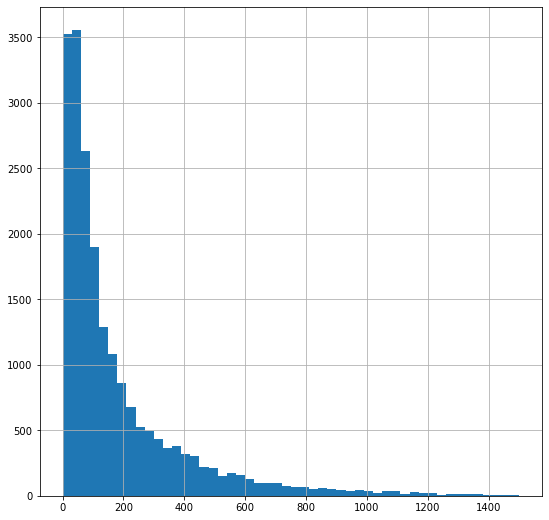

In [44]:
data['days_exposition'].hist(bins=50, range=(0, 1500), figsize = (9, 9))

Изучив данные о времени продажи квартиры видим: 

* Среднее время продажи 181 день
* Медианное время 95 дней
* Обычно время продажи находится между 45 и 231 днями
* Самая "быстрая" квартира продана за 1 день
* Самая "долгая", согласло данным продавалась 1580 дней
* Редкие данные не симметричны. Основное количество выбросов находится выше верхней границы нормальности

Определив "обычные" сделки с временным размахом от 45 до 231, можно сказать, что все сделки, которые были совершены до 45 дней - быстрые продажи, а те, которые продавались дольше 231 дня - долгие продажи.

In [45]:
# Сгруппируем данные по скорости продажи
def days_exposition_cat(row):
    cat = row['days_exposition']
    if cat < 45:
        return 'быстро'
    elif cat > 231:
        return 'долго'
    else:
        return 'обычно'
data['days_exposition_cat'] = data.apply(days_exposition_cat, axis=1)
data.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,pond_distance_km,last_price_mln,price_per_meter_mln,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio,days_exposition_cat
0,санкт-петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,False,...,0.755,13.00,0.12,Thursday,March,2019,другой,0.472222,0.231481,обычно
1,поселок шушары,40.4,18.6,11.0,2.65,1,2.0,1,11.0,False,...,NaN,3.35,0.08,Tuesday,December,2018,первый,0.460396,0.272277,обычно
2,санкт-петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,0.574,5.20,0.09,Thursday,August,2015,другой,0.612500,0.148214,долго
3,санкт-петербург,159.0,45.0,NaN,2.65,3,0.0,9,14.0,False,...,0.234,64.90,0.41,Friday,July,2015,другой,0.283019,NaN,долго
4,санкт-петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,0.048,10.00,0.10,Tuesday,June,2018,другой,0.320000,0.410000,обычно


In [46]:
print((len(data.query('days_exposition < 45')) / len(data) *100),'%') 

21.50951374207188 %


21% всех квартир продается быстрее обычного

In [47]:
print((len(data.query('days_exposition > 231')) / len(data) *100),'%') 

21.61522198731501 %


Еще в 21% случаев квартира продается долго

<AxesSubplot:xlabel='first_day_exposition'>

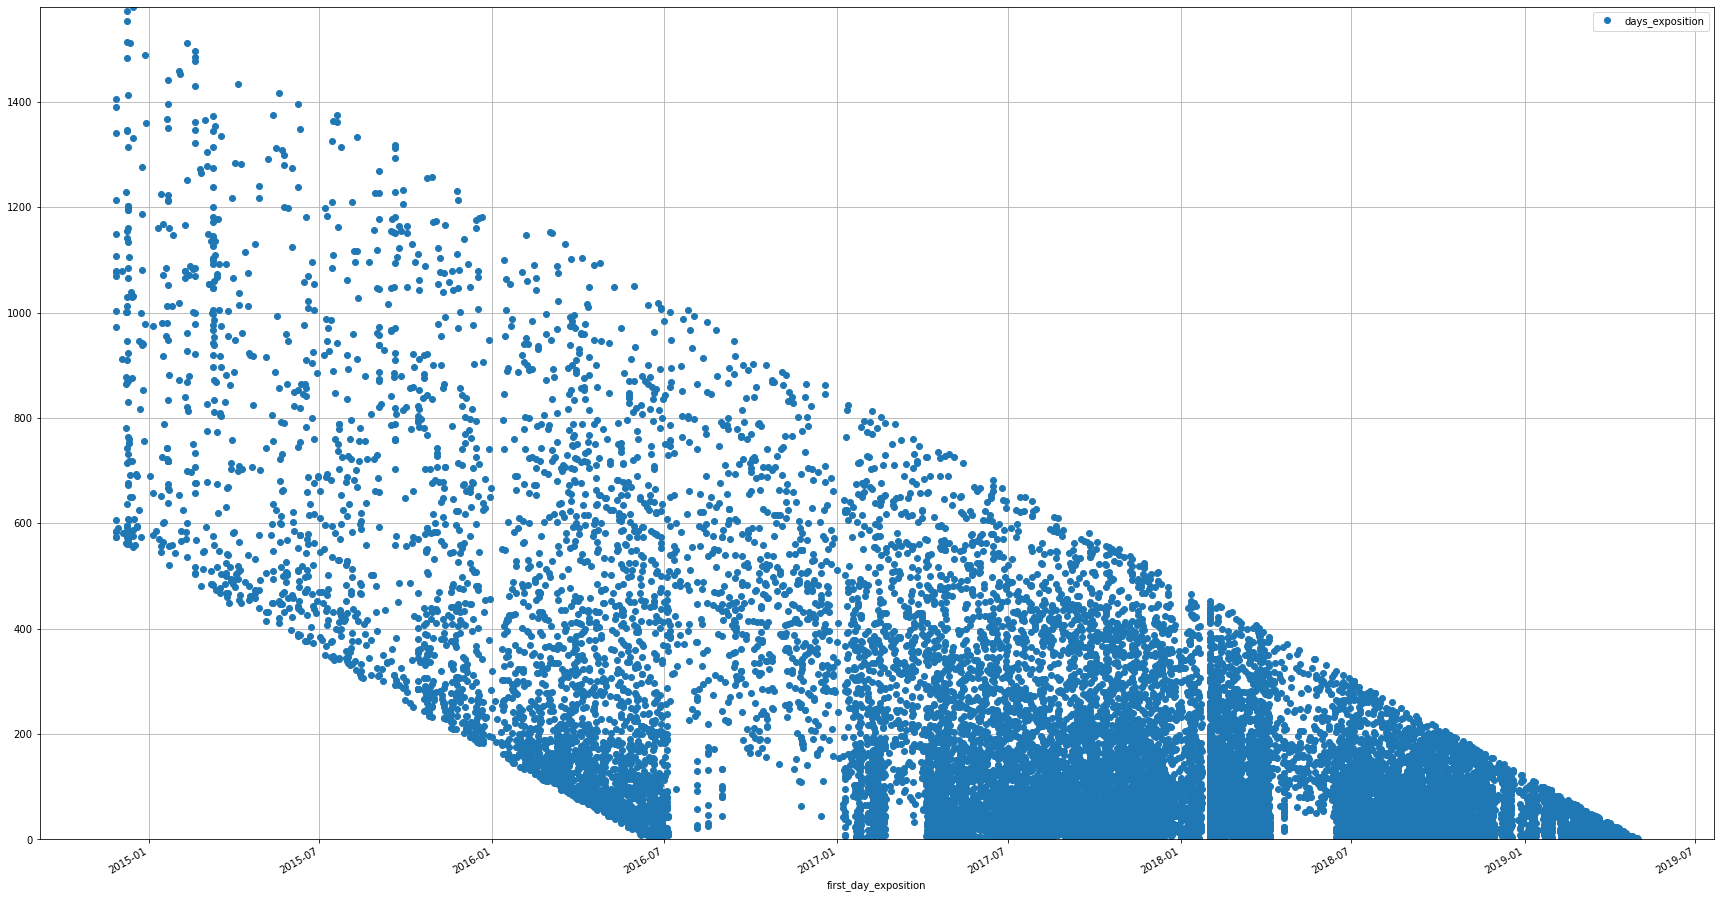

In [48]:
data.plot( x='first_day_exposition',
           y='days_exposition',
           ylim=(0, 1580),
           style='o',
           grid=True,
           figsize=(30, 17))
             


На графике видим, что до 01.2016 квартиры редко попадали в зону "обычный" продаж и объявления "висели" довольно долго. С 01.2016 по 07.2016 время продажи снижается и значения уплотняются у нижней границы графика. Есть промежутки времени, когда квартиры практически не продавались быстро и в меньшей степени с обычной скоростью. Это периоды с 08.2016 по 01.2017, приблизительно с 02.2017 по 03.2017 и с 04.2018 по 06.2018. Есть пространство для дальнейшего анализа, чтобы в будущем избежать "зависших" сделок. Необходимо больше данных о работе сервиса.

**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

Необычных параметров достаточно, довольно странными выглядят:

* максимальная площадь в 900 метров в квадрате
* высота потолка в 1 метр и 100 метров
* квартира с 19 комнатами
* стоимость квартиры 763млн

In [49]:
# изучаем данные о площади квартиры
data['total_area_m2'].describe().round(2)

count    23650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area_m2, dtype: float64

<AxesSubplot:>

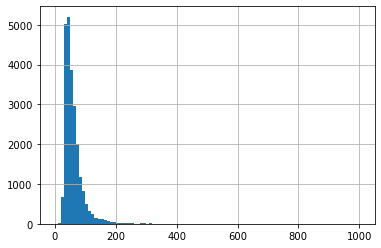

In [50]:
# Строим гистограмму
data['total_area_m2'].hist(bins=100, range=(0, 1000))

<AxesSubplot:>

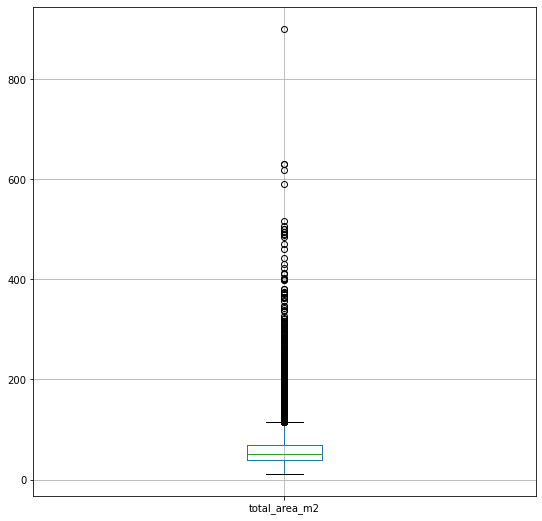

In [51]:
# строим диаграмму размаха
data.boxplot(column='total_area_m2', figsize=(9,9))

Из диаграммы размаха видно:
* Выбросы несимметричны - будем определять только верхнюю границу
* Выбросы смещены за третий квартиль

In [52]:
# Рассчитаем верхнюю границу выбросов
q1 = data['total_area_m2'].quantile(0.25)
q3 = data['total_area_m2'].quantile(0.75)
iqr = q3 - q1 # iqr

q3 + 1.5 * iqr

114.25

Необычно большими считаются квартиры более 114,25м2

In [53]:
# посчитаем долю квартир с площаюдью больше 114,25м2
len(data.query('total_area_m2 > 114.25')) / len(data)

0.05260042283298097

In [54]:
# изучаем данные о высоте потолков
data['ceiling_height_m'].describe().round(2)

count    23650.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height_m, dtype: float64

<AxesSubplot:>

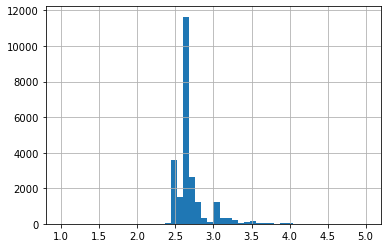

In [55]:
# строим гистограмму
data['ceiling_height_m'].hist(bins=50, range=(1, 5))

Из числового описания данных видим:
* Самый низкий потолок 1 метр, самый высокий 100 метров - оба эти значения выглядят довольно необычно
* В среднем потолок 2,77 метра
* Обычно высота полотка находится между 2,52 и 2,80 метра

<AxesSubplot:>

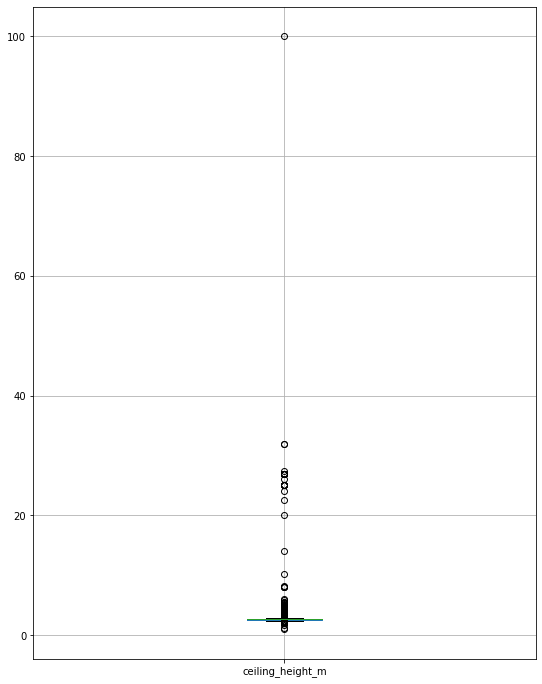

In [56]:
# строим диаграмму размаха
data.boxplot(column='ceiling_height_m', figsize=(9,12))

Из диаграммы размаха видно:
 
* Выбросы несимметричны, но отчетливо видны с обеих сторон ящика - будем определять обе границы выброса
* Выбросы в основном смещены за третий квартиль

In [57]:
# Рассчитаем верхнюю границу выбросов
q1 = data['ceiling_height_m'].quantile(0.25)
q3 = data['ceiling_height_m'].quantile(0.75)
iqr = q3 - q1 # iqr

(q1 - 1.5 * iqr).round(2), (q3 + 1.5 * iqr).round(2)

(2.45, 2.85)

Рассчитали границы нормальности потолков в 2.1 и 3.22 метра 

In [58]:
# изучаем данные о цене квартиры
data['last_price_mln'].describe().round(2)

count    23650.00
mean         6.54
std         10.90
min          0.01
25%          3.40
50%          4.65
75%          6.80
max        763.00
Name: last_price_mln, dtype: float64

<AxesSubplot:>

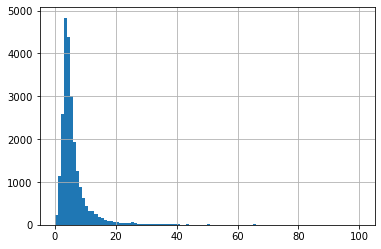

In [59]:
# строим гистограмму
data['last_price_mln'].hist(bins=100, range=(0, 100))

Из числового описания данных видим:
* Самая дешевая квартира стоит 0,01млн
* Самая дорогая 763млн
* Средняя стоимость 6,54млн
* Обычной считается стоимость от 3,4млн до 6,8млн

(0.0, 450.0)

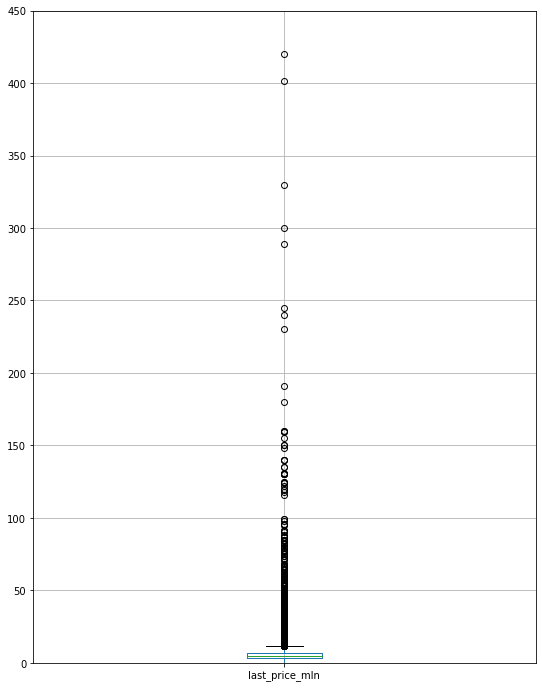

In [60]:
# строим диаграмму размаха цены квартир
data.boxplot('last_price_mln', figsize=(9, 12))
plt.ylim(0, 450)  # изменяем масштаб по горизонтальной оси

Из диаграммы размаха видно:
* Существуют выбросы и находятся в диапазоне выше 11,9млн
* Данные несимметричны
* Данные смещены в направлении третьего квартиля
* Данные плотно сгруппированы в начале выброса и имеют внушительный хвост из единичных значений



In [61]:
# Рассчитаем верхнюю границу выбросов
q1 = data['last_price_mln'].quantile(0.25)
q3 = data['last_price_mln'].quantile(0.75)
iqr = q3 - q1 # iqr
# и приведем цену к миллионам для удобства чтения
(q3 + 1.5 * iqr).round(2)

11.9

Рассчитали верхнюю границу нормальности цены за квартиру в 11.9 млн денег

In [62]:
# подсчитываем долю квартир с ценой свыше 11.9млн
len(data.query('last_price_mln > 11.9')) / len(data) 

0.08575052854122621

In [63]:
# изучаем данные о количестве комнат
data['qt_rooms'].describe().round().astype(int)

count    23650
mean         2
std          1
min          1
25%          1
50%          2
75%          3
max         19
Name: qt_rooms, dtype: int32

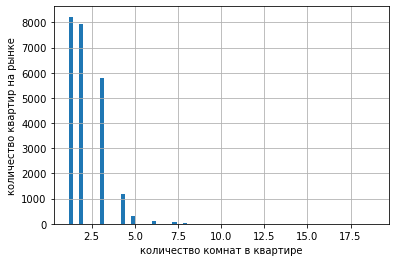

In [64]:
# строим гистограмму
#data['qt_rooms'].hist(bins=150, range=(0, 20), xlabel=('количество комнат'), ylabel=('число квартир'))
#x = data['qt_rooms']

fig, ax = plt.subplots()

ax.hist(data['qt_rooms'], bins = 30, rwidth = 0.4)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('количество комнат в квартире')
ax.set_ylabel('количество квартир на рынке')

plt.show()

Изучив числовые данные о количестве комнат, можно сказать следующее:
* Минимальное количество комнат в квартире 1
* Максимальное количество комнат 19
* Медиана совпадает со средним и составляет 2 комнаты

<AxesSubplot:>

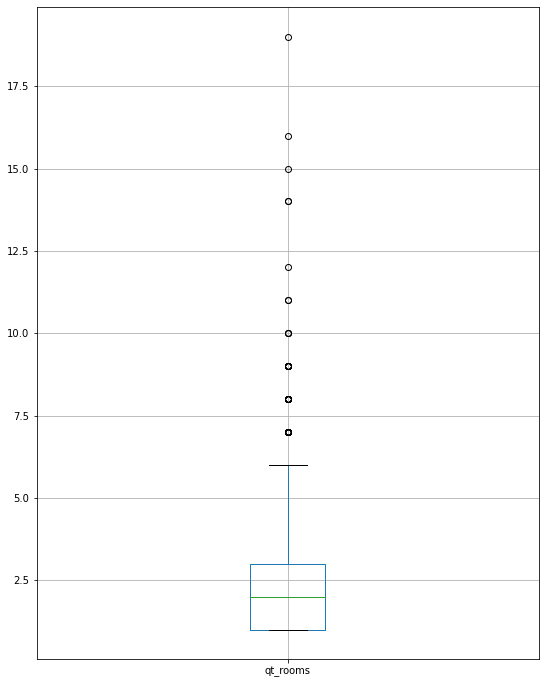

In [65]:
# строим диаграмму размаха
data.boxplot(column='qt_rooms', figsize=(9,12))

Из диаграммы размаха видим:
* Существуют выбросы и находятся в диапазоне выше 6 комнат
* Данные несимметричны
* Данные смещены в направлении третьего квартиля
* Выбросыв не плотно сгруппированы и имеют внушительный хвост из единичных значений

In [66]:
# Рассчитаем верхнюю границу выбросов
q1 = data['qt_rooms'].quantile(0.25)
q3 = data['qt_rooms'].quantile(0.75)
iqr = q3 - q1 # iqr

(q3 + 1.5 * iqr)

6.0

In [67]:
# подсчитываем долю квартир с количеством комнат свыше 6
len(data.query('qt_rooms > 6')) / len(data) 

0.0038054968287526427

Вспомним числовое описание данных

In [68]:
data[['total_area_m2', 'last_price_mln', 'ceiling_height_m', 'qt_rooms']].describe().round(2)

,total_area_m2,last_price_mln,ceiling_height_m,qt_rooms
count,23650.00,23650.00,23650.00,23650.00
mean,60.33,6.54,2.72,2.08
std,35.66,10.90,0.99,1.07
min,12.00,0.01,1.00,1.00
25%,40.00,3.40,2.60,1.00
50%,52.00,4.65,2.65,2.00
75%,69.70,6.80,2.70,3.00
max,900.00,763.00,100.00,19.00


In [69]:
# проведем фильтрацию данных с учетом выбросов
data = data.query('3.22 >= ceiling_height_m >= 2.1')
data = data.query('last_price_mln <= 11.65')
data = data.query('total_area_m2 <= 114.25')
data = data.query('qt_rooms <= 6')

Посмотрим на значения после фильтрации

In [70]:
data[['total_area_m2', 'last_price_mln', 'ceiling_height_m', 'qt_rooms']].describe().round(2)

,total_area_m2,last_price_mln,ceiling_height_m,qt_rooms
count,20946.00,20946.00,20946.00,20946.00
mean,52.19,4.74,2.66,1.91
std,17.38,2.13,0.13,0.87
min,12.00,0.01,2.20,1.00
25%,38.80,3.30,2.60,1.00
50%,48.50,4.35,2.65,2.00
75%,62.50,5.87,2.65,3.00
max,114.20,11.65,3.22,6.00


Из таблицы видим, что число записей сократилось с 23650 до 20946.
* По площади квартир можно сказать: средний размер сократился с 60.32 дл 52.75, а медианное значение сократилось с 52.0 до 49.8. Максимальная площадь уменьшилась с 900 до 114м2.
* Цена квартир: Средняя цена снизилась с 6.54 до 4.50, медианная уменьшилась с 4.65 до 4.5. Максимальная цена упала с 763млн до 11.65
* Высота потолков: Средняя снизилась с 2.72 до 2.66м, медианная, что характерно без измененений, ведь там 9160 медианных значений. Минимальная высота потолков подросла с 1.0м до 2.20, а максимальная снизилась со 100м до 3.22
* Количество комнат: Медиана и среднее значение остались на уровне 2 комнат. А вот максимальное количество сократилось с 19 до 6

**"Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

In [71]:
corr = data[['price_per_meter_mln',\
           'total_area_m2',\
           'days_exposition',\
           'city_center_distance_km',\
           'qt_rooms',\
           'floor_status']].corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,price_per_meter_mln,total_area_m2,days_exposition,city_center_distance_km,qt_rooms
price_per_meter_mln,1.000000,-0.090000,-0.020000,-0.390000,-0.240000
total_area_m2,-0.090000,1.000000,0.100000,-0.100000,0.800000
days_exposition,-0.020000,0.100000,1.000000,-0.020000,0.070000
city_center_distance_km,-0.390000,-0.100000,-0.020000,1.000000,-0.060000
qt_rooms,-0.240000,0.800000,0.070000,-0.060000,1.000000


На стоимость квадратного метра квартиры сильнее всего влияет итоговая цена и количество комнат. Ну и отрицательная корреляция между стоимостью за квадрат и центром тоже имеет место быть. Предположу, что на самом деле еще сильнее влияют ожидания и референсы продавца.

                         city_center_distance_km  days_exposition  \
city_center_distance_km                 1.000000        -0.144243   
days_exposition                        -0.144243         1.000000   
price_per_meter_mln                    -0.601946         0.184163   
qt_rooms                               -0.404455         0.158661   
total_area_m2                          -0.508919         0.236908   

                         price_per_meter_mln  qt_rooms  total_area_m2  
city_center_distance_km            -0.601946 -0.404455      -0.508919  
days_exposition                     0.184163  0.158661       0.236908  
price_per_meter_mln                 1.000000  0.316139       0.537692  
qt_rooms                            0.316139  1.000000       0.851226  
total_area_m2                       0.537692  0.851226       1.000000  


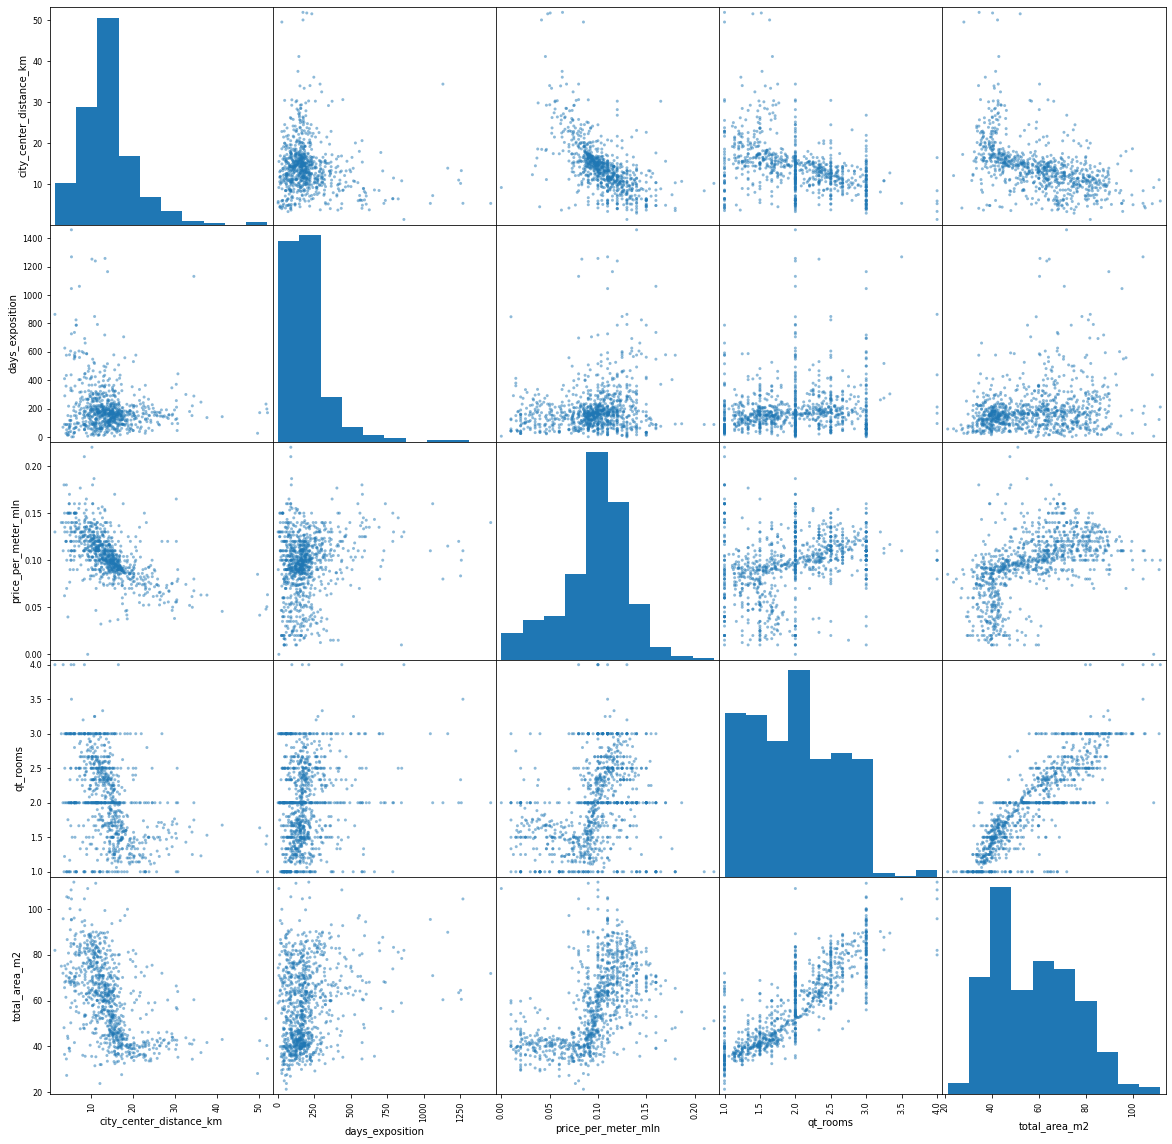

In [72]:
# собираем таблицу для матрицы корреляций
corr_multi = data.pivot_table(index='last_price_mln', values=[
    'price_per_meter_mln', 
    'total_area_m2', 
    'days_exposition', 
    'city_center_distance_km', 
    'qt_rooms', 
    'floor_status'
])
print(corr_multi.corr())
# рисуем матрицу корреляций
pd.plotting.scatter_matrix(corr_multi, figsize=(20, 20))
plt.show()

На графике наглядно видим отрицательную линейную зависимость между дистнцией от центра и ценой квартиры. Зависимости между временем продажи и ценой нет, данные на графике образуют облако. По связаным параметрам: количество комнат и общая площадь прослеживается нелинейная прямая взаимосвязь. Максимум очевидности: больше площадь - выше цена. Предположительно, зависимость нелинейная из-за того что двушки около 50м2 дешевле однушек того же метража. Есть пространство для дальнейшего анализа.

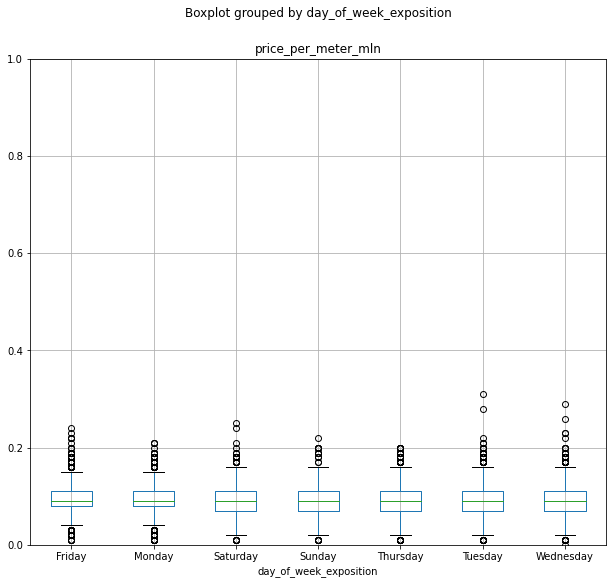

In [73]:
plot = data.boxplot('price_per_meter_mln', by='day_of_week_exposition',figsize=(10,9)).set_ylim(0,1)

Из диаграммы видно, что в зависимости от месяца, когда объявление выставлено на продажу цена за квадратный метр не меняется в медианном значении. Но можно сказать, что в пятницу и понедельник, немного, но дороже, чем всегда.

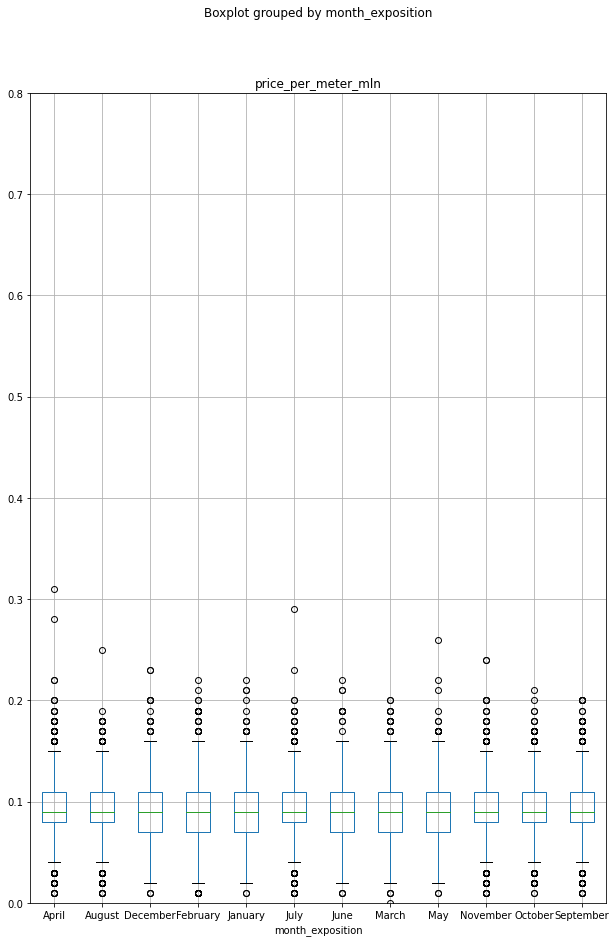

In [74]:
plot = data.boxplot('price_per_meter_mln', by='month_exposition',figsize=(10,15)).set_ylim(0,0.8)

Из диаграммы видно, что в зависимости от месяца, когда объявление выставлено на продажу цена за квадратный метр меняется. В апреле, агусте, июле, ноябре, окрябре и сентябре - дороже, чем в остальные полгода

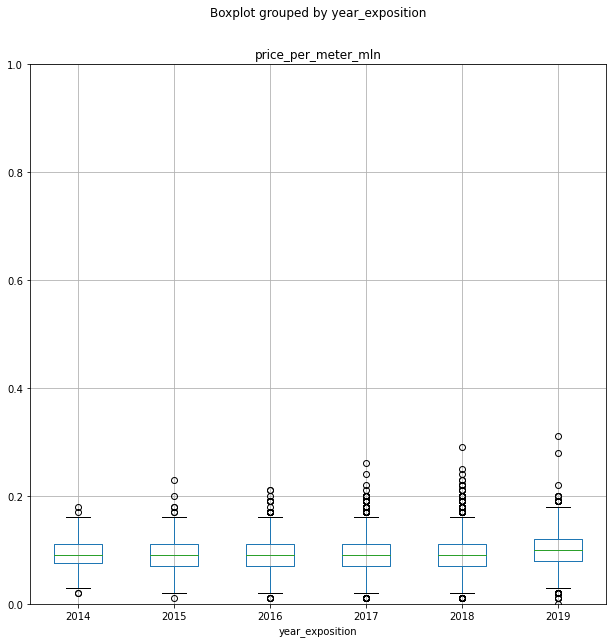

In [75]:
plot = data.boxplot('price_per_meter_mln', by='year_exposition',figsize=(10,10)).set_ylim(0,1)

Из диаграммы видно, что в зависимости от года, когда объявление выставлено на продажу цена за квадратный метр была самой высокой в 2019

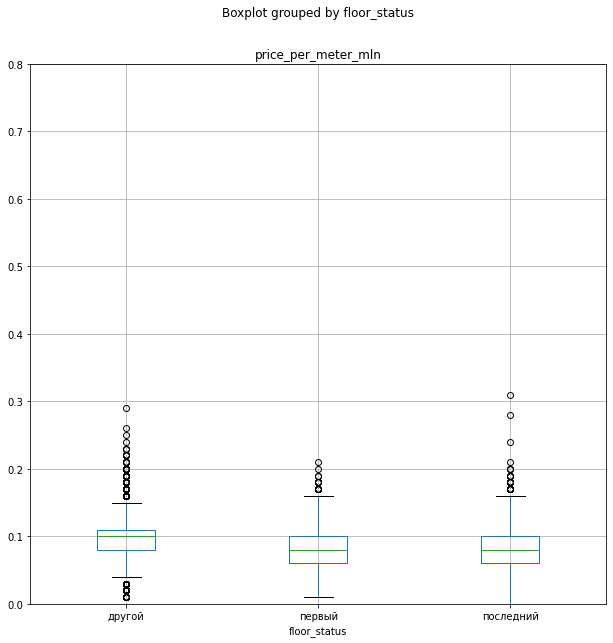

In [76]:
plot = data.boxplot('price_per_meter_mln', by='floor_status',figsize=(10,10)).set_ylim(0,0.8)

Однозначно можно сказать, что средние этажи самые дорогие, а последний самый дешевый

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'**

In [77]:
(data['town_name'].value_counts() / data.shape[0] * 100).head(11)

санкт-петербург      63.033515
поселок мурино        2.644896
поселок шушары        2.081543
всеволожск            1.861931
колпино               1.589802
пушкин                1.565931
поселок парголово     1.556383
гатчина               1.432254
деревня кудрово       1.422706
выборг                1.040772
петергоф              0.921417
Name: town_name, dtype: float64

Нашли города с самым большим количеством объявлений. Так как нет фильтра что является городом, деревней или ПГТ, то будем считать все, кроме Питера — пригородом. Посмотрим на топ 10 по стоимости квадратного метра. Тем более распределение выглядит как 66 в Питере на 33 не в нем.

In [78]:
data.groupby('town_name').agg(
    {'price_per_meter_mln':'mean'}
).sort_values(by='price_per_meter_mln', ascending=False).head(10)

,price_per_meter_mln
town_name,
санкт-петербург,0.105401
зеленогорск,0.102381
сестрорецк,0.101173
пушкин,0.100366
поселок лисий нос,0.100000
поселок левашово,0.100000
кудрово,0.100000
деревня мистолово,0.099091
мурино,0.092353


Таблица отображает 10 городов с самой высокой ценой

In [79]:
data.groupby('town_name').agg({'price_per_meter_mln':'mean'}).sort_values(by='price_per_meter_mln', ascending=False).tail(10)

,price_per_meter_mln
town_name,
деревня ям-тесово,0.015
деревня фалилеево,0.015
деревня малая романовка,0.010
деревня старополье,0.010
поселок тесово-4,0.010
деревня выскатка,0.010
деревня вахнова кара,0.010
деревня бор,0.010
поселок совхозный,0.010


Таблица отображает 10 городов с самой низкой ценой

In [80]:
# напишем функцию, которая сгруппирует города по принципу "питер" и "лен. область"
def town_status(row):
    if row['town_name'] == 'санкт-петербург':
        return 'питер'
    else:
        return 'лен. область'
    

In [81]:
# добавим в таблицу столбец с сортировкой
data['town_status'] = data.apply(town_status, axis=1)

In [82]:
# сравним цены в питере и в области
data.groupby('town_status').agg({'price_per_meter_mln': 'mean'}).sort_values(by='price_per_meter_mln')

,price_per_meter_mln
town_status,
лен. область,0.068391
питер,0.105401


В среднем цена за квадратный метр в Питере дороже на 0,04млн, чем в области

In [83]:
data.groupby('town_status').agg({'price_per_meter_mln':'median'}).sort_values(by='price_per_meter_mln')

,price_per_meter_mln
town_status,
лен. область,0.07
питер,0.10


В области цена все еще ниже. Медианное значение цены за квадратный метр в области и в питере различается на 0,03млн.

(0.0, 1.0)

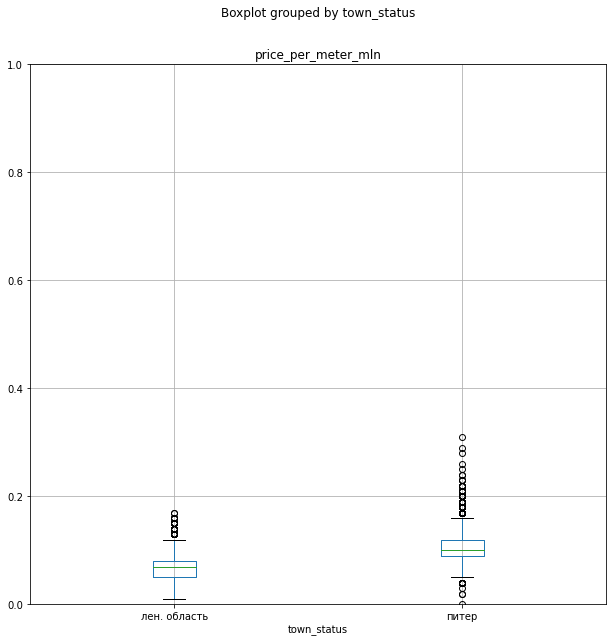

In [84]:
plot = data.boxplot('price_per_meter_mln', by='town_status', figsize=(10,10))
plot.set_ylim(0,1)

Из графика отчетливо видно, что в Питере цена выше и то что в области обычная цена за квадратный метр, то в Питере - цена ниже обычной. Так же наглядно показано насколько в Питере продается больше квартир, чем в области в целом.

In [85]:
# соберем топ-10 городов по количеству объявлений и посмотрим сколько их
top_10_data = data.groupby('town_name')\
    .agg({'town_status':'count','price_per_meter_mln':'mean'})
top_10_data = top_10_data.sort_values('town_status', ascending=False).head(11)

In [86]:
top_10_data.sort_values('price_per_meter_mln', ascending=False).head(11)

,town_status,price_per_meter_mln
town_name,,
санкт-петербург,13203,0.105401
пушкин,328,0.100366
деревня кудрово,298,0.092282
поселок парголово,326,0.090613
поселок мурино,554,0.085794
петергоф,193,0.083575
поселок шушары,436,0.078830
колпино,333,0.075195
гатчина,300,0.068900


<AxesSubplot:ylabel='town_name'>

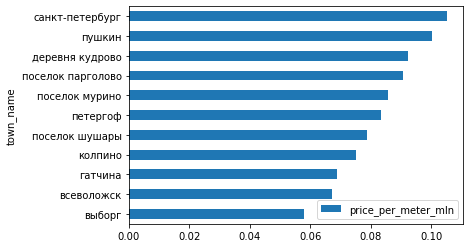

In [87]:
top_10_data.sort_values('price_per_meter_mln', ascending=True)\
    .drop('town_status', axis=1).plot(kind='barh')

График наглядно объясняет, что где и почем

In [88]:
top_10_list = top_10_data.reset_index().town_name.to_list()

In [89]:
top_10_list

['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'колпино',
 'пушкин',
 'поселок парголово',
 'гатчина',
 'деревня кудрово',
 'выборг',
 'петергоф']

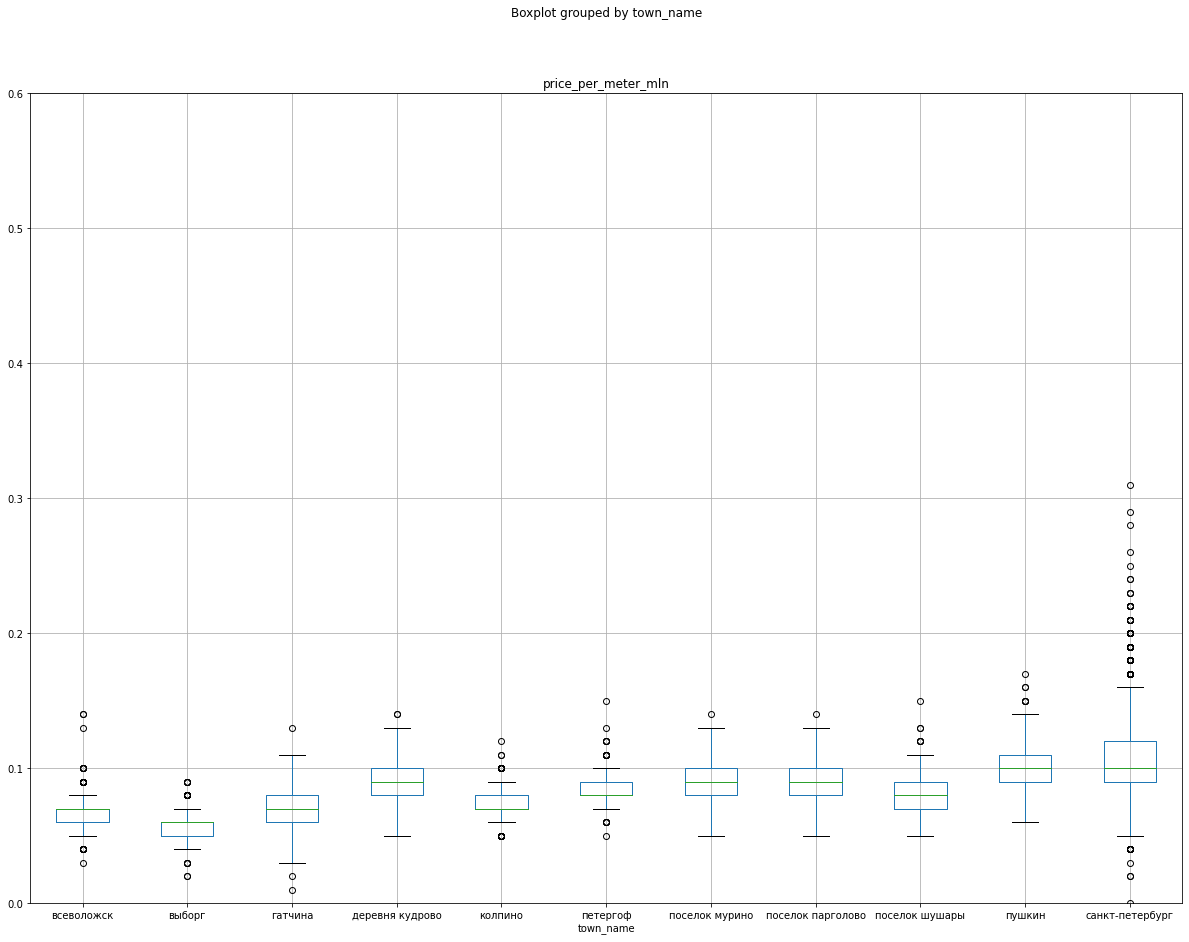

In [90]:
# рисуем размах цент за квадратный метр в топ-10 городах
plot = data[data.town_name.isin(top_10_list)]\
    .boxplot('price_per_meter_mln', by='town_name',figsize=(20,15))\
    .set_ylim(0,0.6)

В Питере квартиры дороже, в лен. области дешевле. Самые дорогие квартиры в Питере, самые дешевые в Выборге. Судя по названиям населенных пунктов, где есть приставки, в деревнях и поселках, в основном продаются квартиры по "обычным" ценам. А в городках есть выбивающиеся из нормы цены

**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20946 entries, 1 to 23698
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   town_name                 20946 non-null  object        
 1   total_area_m2             20946 non-null  float64       
 2   living_area_m2            20946 non-null  float64       
 3   kitchen_area_m2           18938 non-null  float64       
 4   ceiling_height_m          20946 non-null  float64       
 5   qt_rooms                  20946 non-null  int64         
 6   qt_balconies              10969 non-null  float64       
 7   floor                     20946 non-null  int64         
 8   floors_total              20874 non-null  float64       
 9   is_apartment              20946 non-null  bool          
 10  is_studio                 20946 non-null  bool          
 11  is_open_plan              20946 non-null  bool          
 12  total_images      

In [92]:
# Посмотрим сколько ненулевых значений
15532 / data.shape[0]

0.741525828320443

3/4, устраивает, заполнять не будем, так как не понятно, чем заполнять. Медиана или среднее может ухудшить набор данных. 

In [93]:
# соберем новый фрейм на непустых значениях
city_center_data = data.dropna(subset=['city_center_distance_km'])

In [94]:
# посмотрим сколько у нас километров до центра
city_center_data['city_center_distance_km'].describe()

count    15532.000000
mean        15.227400
std          8.415326
min          0.329000
25%         10.894000
50%         13.783500
75%         16.788000
max         65.968000
Name: city_center_distance_km, dtype: float64

In [95]:
# Добавим категории по круглым километрам
def city_center_status_km(row):
    if row['city_center_distance_km'] < 2:
        return 1
    elif 2 <= row['city_center_distance_km'] < 3:
        return 2
    elif 3 <= row['city_center_distance_km'] < 4:
        return 3
    elif 4 <= row['city_center_distance_km'] < 5:
        return 4
    elif 5 <= row['city_center_distance_km'] < 6:
        return 5
    elif 6 <= row['city_center_distance_km'] < 7:
        return 6
    elif 2 <= row['city_center_distance_km'] < 8:
        return 7
    elif 2 <= row['city_center_distance_km'] < 9:
        return 8
    elif 2 <= row['city_center_distance_km'] < 10:
        return 9
    elif 2 <= row['city_center_distance_km'] < 11:
        return 10
    elif 2 <= row['city_center_distance_km'] < 12:
        return 11
    elif 2 <= row['city_center_distance_km'] < 13:
        return 12
    elif 2 <= row['city_center_distance_km'] < 14:
        return 13
    elif 2 <= row['city_center_distance_km'] < 15:
        return 14
    elif 2 <= row['city_center_distance_km'] < 16:
        return 15
    elif 2 <= row['city_center_distance_km'] < 17:
        return 16
    else:
        return '20'
city_center_data['city_center_status_km'] = data.apply(city_center_status_km, axis=1).astype('int')

In [96]:
city_center_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15532 entries, 1 to 23697
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   town_name                 15532 non-null  object        
 1   total_area_m2             15532 non-null  float64       
 2   living_area_m2            15532 non-null  float64       
 3   kitchen_area_m2           14222 non-null  float64       
 4   ceiling_height_m          15532 non-null  float64       
 5   qt_rooms                  15532 non-null  int64         
 6   qt_balconies              8211 non-null   float64       
 7   floor                     15532 non-null  int64         
 8   floors_total              15470 non-null  float64       
 9   is_apartment              15532 non-null  bool          
 10  is_studio                 15532 non-null  bool          
 11  is_open_plan              15532 non-null  bool          
 12  total_images      

In [97]:
# выберем из того, где есть километры до центра квартиры в питере
spb_flats = city_center_data.loc[data.loc[:,'town_status']== 'питер']
spb_flats.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,price_per_meter_mln,day_of_week_exposition,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio,days_exposition_cat,town_status,city_center_status_km
2,санкт-петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,0.09,Thursday,August,2015,другой,0.612500,0.148214,долго,питер,13
4,санкт-петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,0.10,Tuesday,June,2018,другой,0.320000,0.410000,обычно,питер,8
7,санкт-петербург,71.6,30.5,18.9,2.65,2,2.0,22,24.0,False,...,0.11,Thursday,April,2019,другой,0.425978,0.263966,обычно,питер,11
9,санкт-петербург,61.0,43.6,6.5,2.50,3,2.0,7,9.0,False,...,0.09,Sunday,February,2017,другой,0.714754,0.106557,долго,питер,15
10,санкт-петербург,39.6,20.3,8.5,2.67,1,NaN,3,12.0,False,...,0.13,Thursday,November,2017,другой,0.512626,0.214646,обычно,питер,13


In [98]:
#Считаем среднюю цену для каждого километра
data_mean_km = spb_flats.pivot_table(index='city_center_status_km', values='price_per_meter_mln', aggfunc='mean')
data_mean_km['city_center_status_km'] = data_mean_km.index
data_mean_km

,price_per_meter_mln,city_center_status_km
city_center_status_km,,
1,0.118640,1
2,0.113407,2
3,0.110957,3
4,0.121278,4
5,0.122825,5
6,0.120405,6
7,0.117740,7
8,0.111670,8
9,0.105733,9


Помним оценку зависимости между ценой за квадратный метр и расстоянием до центра, она линейная и отрицательная. То есть, чем дальше центр, тем дешевле квартира. Видим неожиданное повышение цены в точке 4 км от центра. Вероятно, там он и закончился.

<AxesSubplot:xlabel='city_center_status_km'>

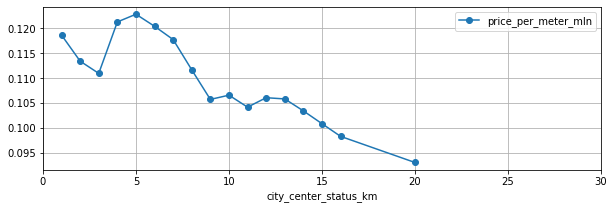

In [99]:
#spb_flats.plot(x='city_center_status_km', y='price_per_meter_mln', kind='hist', bins=30, grid=True) 
data_mean_km.plot(
    x='city_center_status_km', 
    y='price_per_meter_mln', 
    style='o-', 
    xlim=(0, 30
         ), grid=True, figsize=(10, 3)) 

А вот и наша аномалия с ростом цен при удалении от центра. Отчётливо видно, что рост цен в точках 4 и 5 км от центра, далее значения раполагаются практически линейно.

In [100]:
#Посмотрим сколько квартир расположено в трехкилометровой зоне
len(spb_flats.query('city_center_status_km < 4')) / len(data)

0.025876062255323212

2% - очень мало, как и должно быть

In [101]:
#Посмотрим количество квартир в аномальной зоне
len(spb_flats.query('city_center_status_km >= 4 and city_center_status_km < 7')) / len(data)

0.05709920748591617

5% - квартир в зоне аномального скачка цен. Тоже очень мало. Примем эти квартиры в зону "центр" и ограничим его, расстоянием менее 7 км.

**"Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"**

In [102]:
spb_flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13163 entries, 2 to 23697
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   town_name                 13163 non-null  object        
 1   total_area_m2             13163 non-null  float64       
 2   living_area_m2            13163 non-null  float64       
 3   kitchen_area_m2           12035 non-null  float64       
 4   ceiling_height_m          13163 non-null  float64       
 5   qt_rooms                  13163 non-null  int64         
 6   qt_balconies              6924 non-null   float64       
 7   floor                     13163 non-null  int64         
 8   floors_total              13107 non-null  float64       
 9   is_apartment              13163 non-null  bool          
 10  is_studio                 13163 non-null  bool          
 11  is_open_plan              13163 non-null  bool          
 12  total_images      

In [103]:
# Сгруппируем данные по расстоянию до центра
def center_cat(row):
    cat = row['city_center_distance_km']
    if cat < 7:
        return True 
    else:
        return False
spb_flats['is_center'] = spb_flats.apply(center_cat, axis=1)

# Сгруппируем данные по расстоянию до центра
def center_cat(row):
    cat = row['city_center_distance_km']
    if cat < 7:
        return 'центр' 
    else:
        return 'окраины'
spb_flats['center_cat'] = spb_flats.apply(center_cat, axis=1)

In [104]:
spb_flats.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,qt_rooms,qt_balconies,floor,floors_total,is_apartment,...,month_exposition,year_exposition,floor_status,total_living_area_ratio,total_kitchen_area_ratio,days_exposition_cat,town_status,city_center_status_km,is_center,center_cat
2,санкт-петербург,56.0,34.3,8.3,2.65,2,0.0,4,5.0,False,...,August,2015,другой,0.612500,0.148214,долго,питер,13,False,окраины
4,санкт-петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,False,...,June,2018,другой,0.320000,0.410000,обычно,питер,8,False,окраины
7,санкт-петербург,71.6,30.5,18.9,2.65,2,2.0,22,24.0,False,...,April,2019,другой,0.425978,0.263966,обычно,питер,11,False,окраины
9,санкт-петербург,61.0,43.6,6.5,2.50,3,2.0,7,9.0,False,...,February,2017,другой,0.714754,0.106557,долго,питер,15,False,окраины
10,санкт-петербург,39.6,20.3,8.5,2.67,1,NaN,3,12.0,False,...,November,2017,другой,0.512626,0.214646,обычно,питер,13,False,окраины


В таблице появился столбец с разделением города на центр и окраины

In [105]:
city_in_center = spb_flats.query('city_center_status_km < 7')

In [106]:
cor_in_center = city_in_center.corr()\
        .sort_values('price_per_meter_mln', ascending=False)\
        .filter(items = ['price_per_meter_mln'])\
        .reset_index()
cor_in_center

,index,price_per_meter_mln
0,price_per_meter_mln,1.000000
1,total_kitchen_area_ratio,0.442725
2,qt_balconies,0.388875
3,floors_total,0.335922
4,floor,0.243500
5,last_price_mln,0.238017
6,airport_distance_km,0.170856
7,year_exposition,0.143647
8,park_distance_km,0.112016
9,total_images,0.087301


In [107]:
city_out_of_center = spb_flats.query('city_center_status_km >= 7')

In [108]:
cor_out_of_center = city_out_of_center.corr()\
        .sort_values('price_per_meter_mln', ascending=False)\
        .filter(items = ['price_per_meter_mln'])\
        .reset_index()
cor_out_of_center

,index,price_per_meter_mln
0,price_per_meter_mln,1.000000
1,total_kitchen_area_ratio,0.413776
2,last_price_mln,0.385402
3,floors_total,0.313897
4,floor,0.237317
5,kitchen_area_m2,0.228647
6,ceiling_height_m,0.218214
7,year_exposition,0.176945
8,qt_balconies,0.163478
9,total_images,0.134975


In [109]:
# Склеим таблицы
cor_in_out_center = cor_in_center.merge(cor_out_of_center, on='index')
cor_in_out_center = cor_in_out_center.rename(columns={
    'price_per_meter_mln_x':'cor_in_center', 
    'price_per_meter_mln_y':'cor_out_of_center'
})
cor_in_out_center

,index,cor_in_center,cor_out_of_center
0,price_per_meter_mln,1.000000,1.000000
1,total_kitchen_area_ratio,0.442725,0.413776
2,qt_balconies,0.388875,0.163478
3,floors_total,0.335922,0.313897
4,floor,0.243500,0.237317
5,last_price_mln,0.238017,0.385402
6,airport_distance_km,0.170856,0.020442
7,year_exposition,0.143647,0.176945
8,park_distance_km,0.112016,0.057796
9,total_images,0.087301,0.134975


Что для центра хорошо, для переферии — смерть. Величина коэффициента корреляции отражает силы связи. На основании коэфициента корреляции в центре имеет значение:

- Все виды площадей
- Количество комнат
- Высота потолков
- Цена за квадрат
- Тем временем на переферерии:

- Все виды площадей
- Количество комнат
- Высота потолков
- Цена за квадрат
- Балконы

Дальше величина коэффициента корреляции между переменными ниже 0,25 и это очень слабая корреляцияне стоит брать ее в расчет На самом деле, нельзя, что потребности как-то серьезно отличаются. Плюс мы сравнивали 2 набора данных, которые не были соразмерными друг другу

1738
total_area_m2


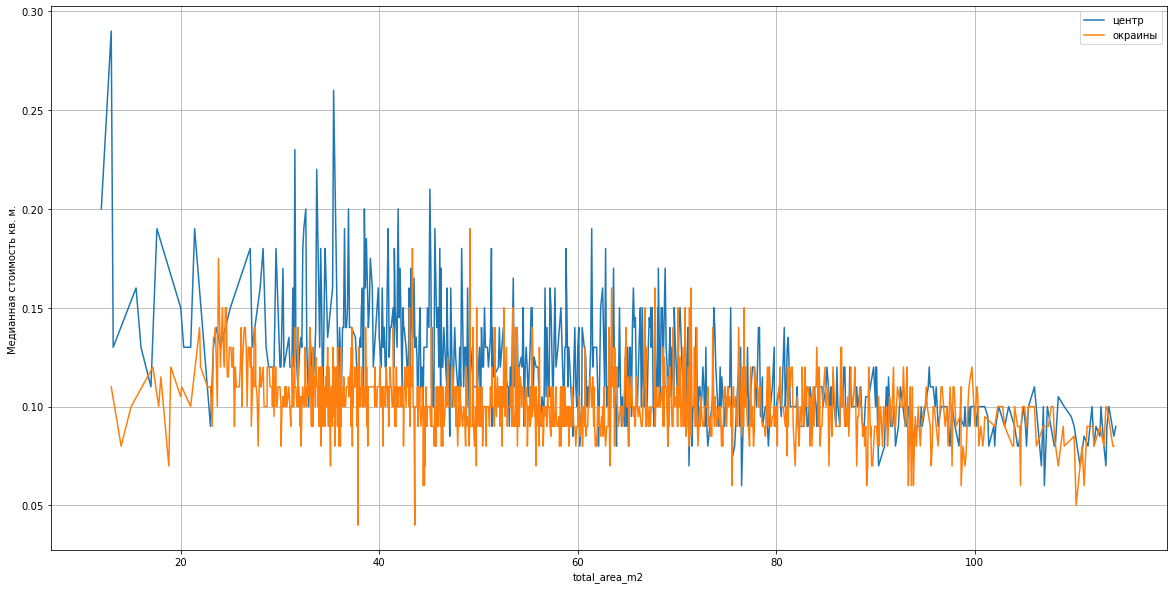

1738
last_price_mln


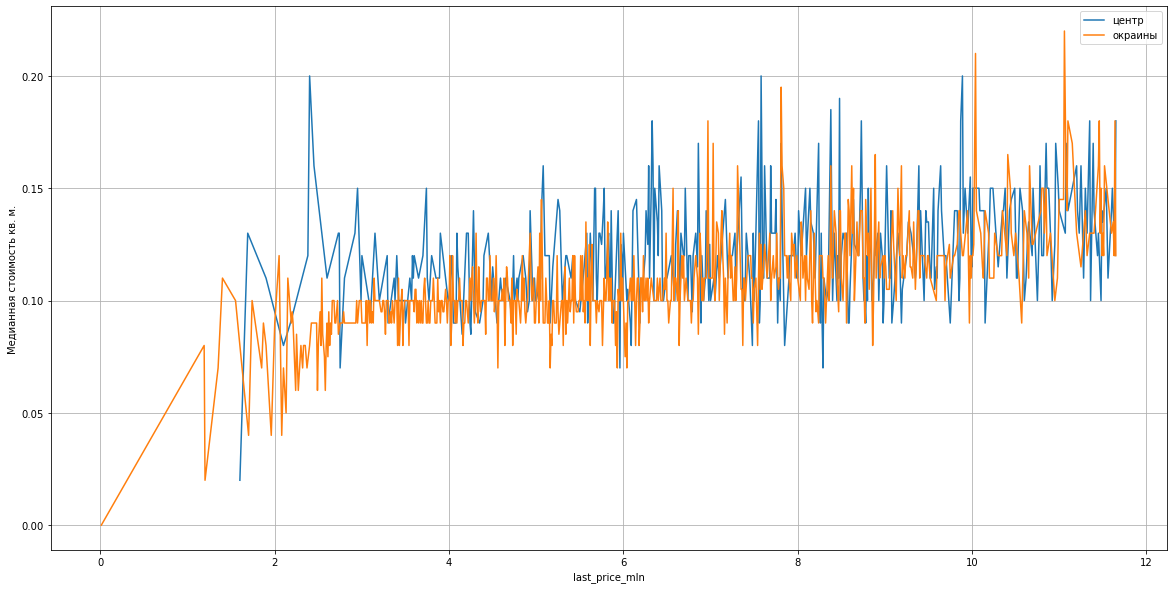

1738
qt_rooms


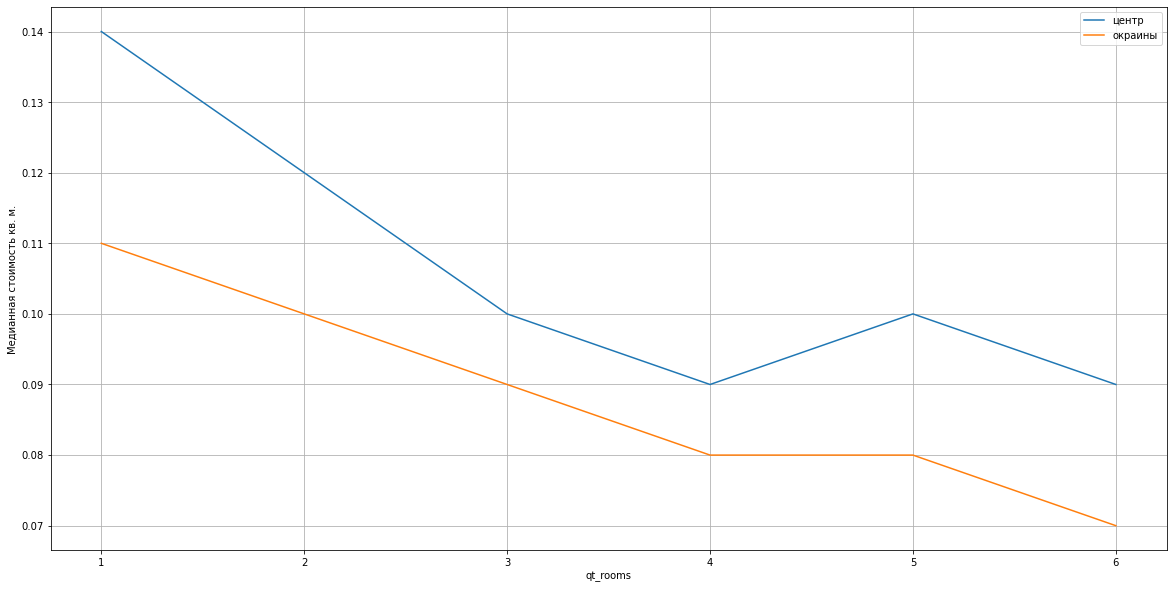

1738
ceiling_height_m


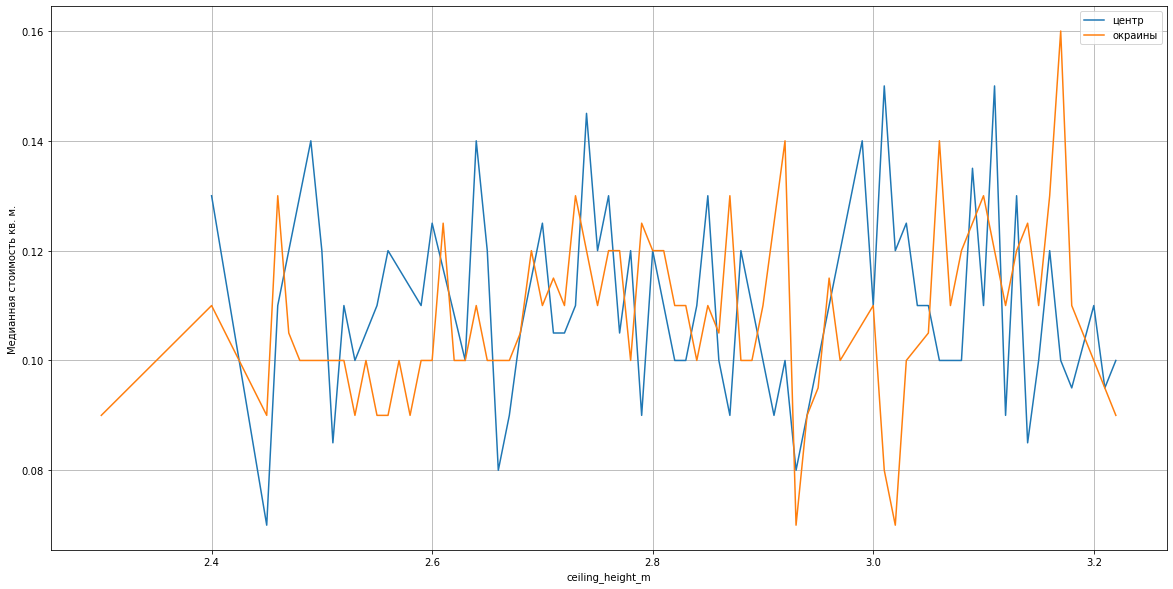

1738
floor_status


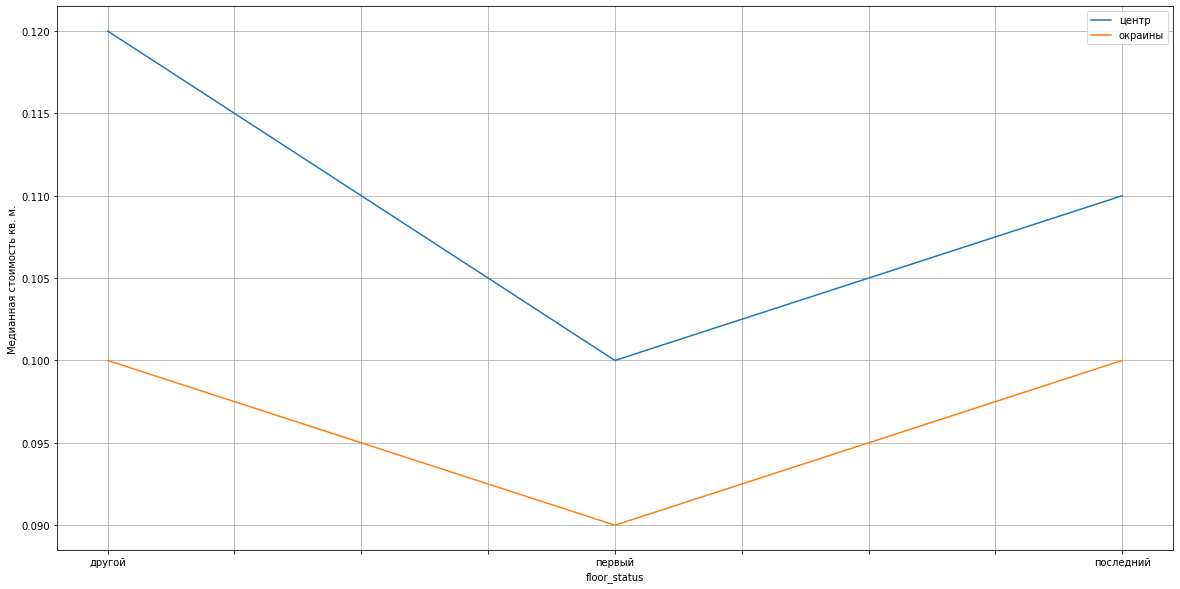

1738
city_center_status_km


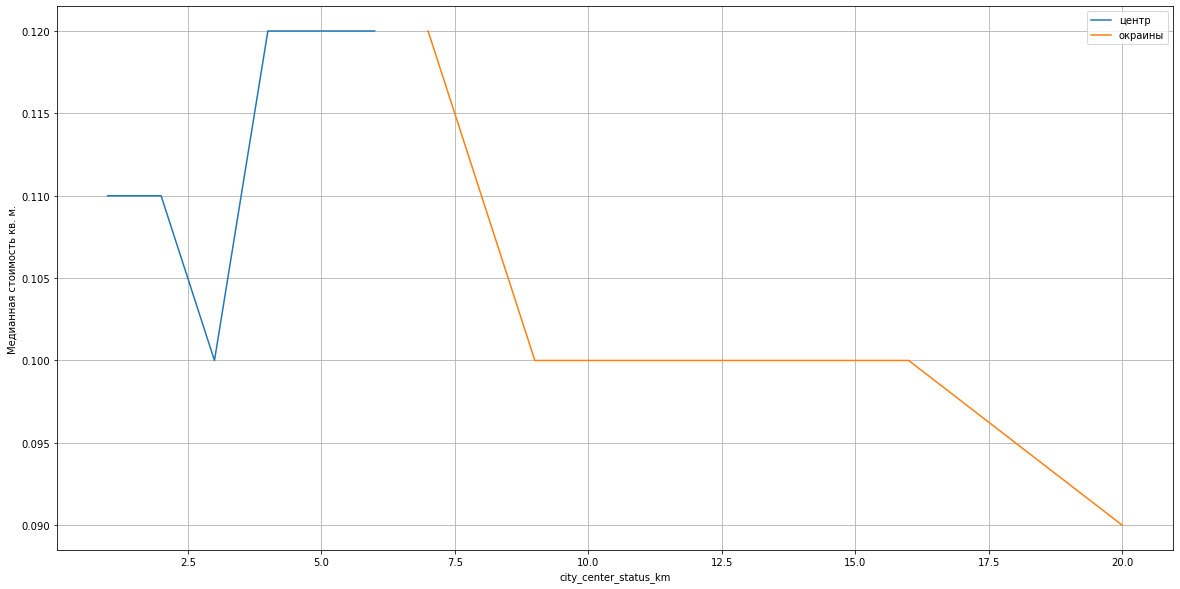

1738
day_of_week_exposition


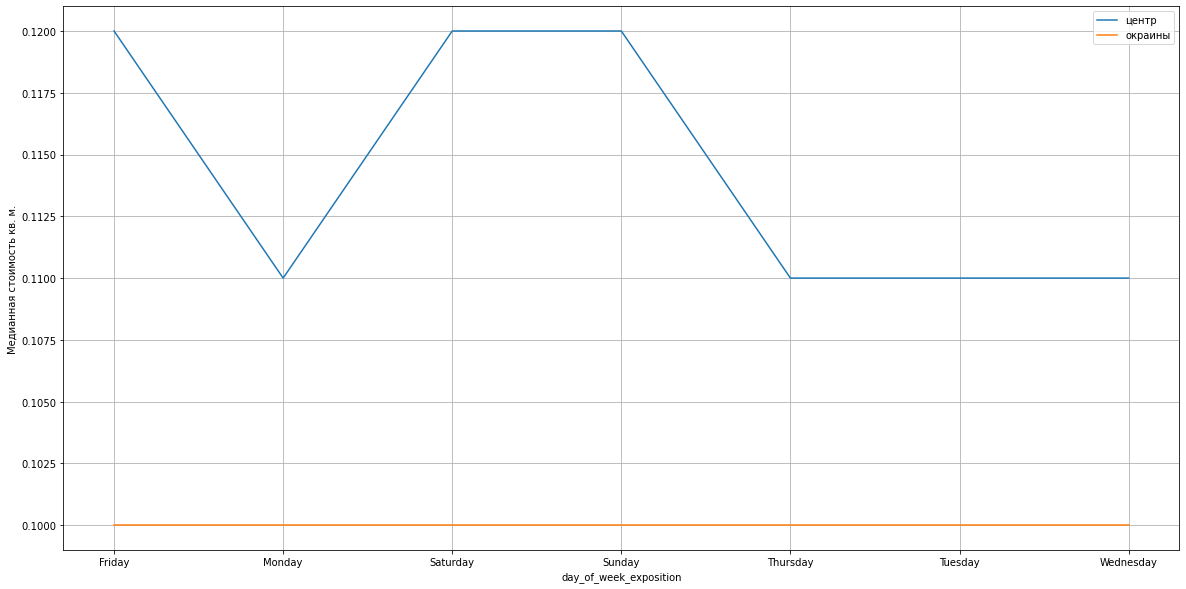

1738
month_exposition


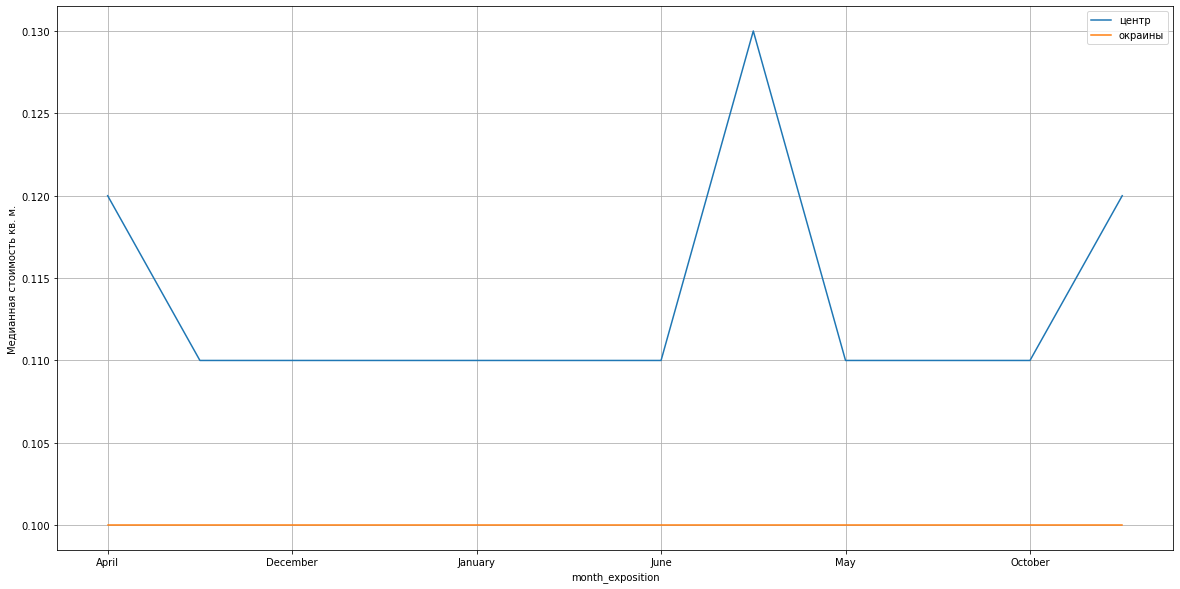

1738
year_exposition


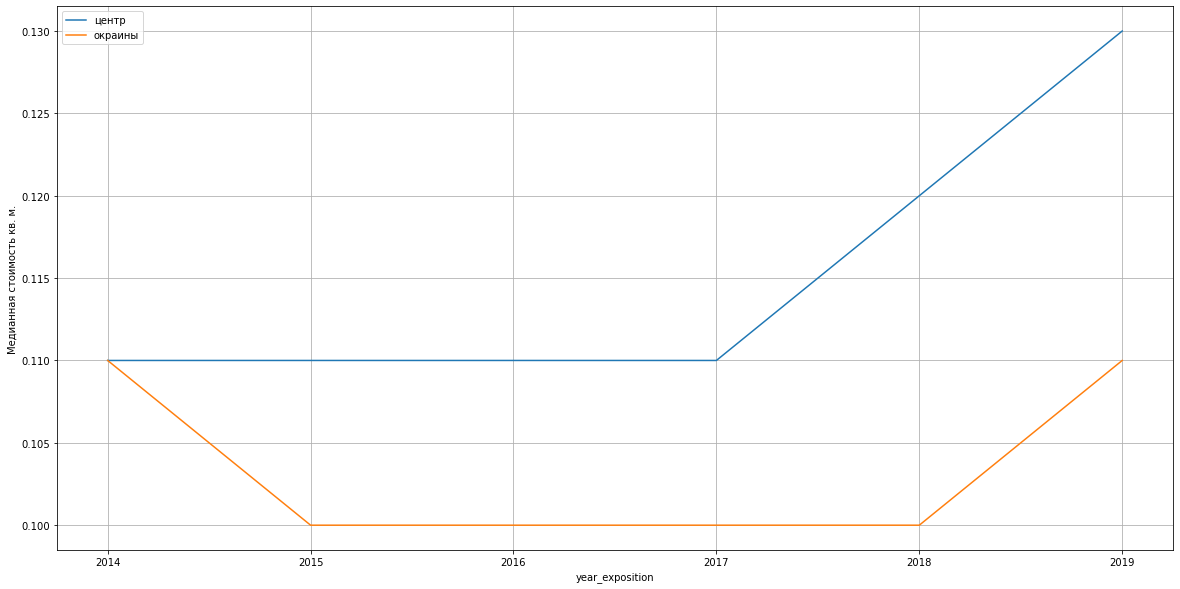

In [110]:
for factor in ['total_area_m2',
               'last_price_mln',
               'qt_rooms',
               'ceiling_height_m',
               'floor_status',
               'city_center_status_km',
               'day_of_week_exposition',
               'month_exposition',
               'year_exposition']:
     print(spb_flats.query('city_center_status_km < 7').shape[0]) 
     print(factor)
     new1 = spb_flats.query('city_center_status_km < 7').pivot_table(index = factor, values = 'price_per_meter_mln', 
                                                                    aggfunc='median')

    
     new1.rename(columns={'price_per_meter_mln' : 'центр'}, inplace=True)
    
     ax = new1.plot(grid = True, figsize=(20,10), label = 'центр')

    
     (spb_flats.query('city_center_status_km >= 7').pivot_table(index = factor,
                                                                values = 'price_per_meter_mln',
                                                                aggfunc='median')
      .rename(columns={'price_per_meter_mln' : 'окраины'}).plot(grid = True,figsize=(20,10),label = 'окраины', ax=ax))


    
     plt.ylabel('Медианная стоимость кв. м.')
     ax.legend()
     plt.show()

Из графиков видим следующее:
 - в центре активнее выставляются на продажу квартиры до 60м2, на переферии чаще встречаются квартиры от 70м2.
 - цена квадратного метра везде зависит от стоимости квартиры.
 - однокомнатные квартиры везде дороже остальных, но в центре пятикомнатные квартиры ценятся выше четырех и шестикомнатных, а на переферии нет.
 - в центре высота потолков имеет больше влияния на медианную стоимость кавртиры, чем на переферии.
 - и в центре и на окраине предпочитают средние этажи. На переферии самый дешевый первый, а последний скорее равен среднему, чем первому. В центре самый дорогой средний этаж, а первый дешевле последнего.
 - прямая и обратная зависимости цены за квадратный метр по удалению от самого центра города. В центре стоимость квадратного метра при удалении от центра растет, на окраинах падает.
 - в центре квартиры дороже с пятницы до понедельника, на окраинах одинаково всегда
 - в центре квартиры дорожают в некоторые месяцы, на окраинах одинаково всегда
 - в 2014 на окраинах квартира столько же, как в центре. В 2015 цена на окраине снизилась и оставалась без изменений до 2018, в центре начала расти с 2017 

### Вывод

- изучены следующие параметры: площадь, цена, число комнат, высота потолков
-  построены гистограммы для каждого параметра
-  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. "
- выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

## Общий вывод

В таблице 22 столбца. Тип данных:

* bool - 2 столбца, 
* float64 - 14 стоблцов, 
* int64 - 3 столбца, 
* object - 3 столбца.

Согласно документации к данным:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

В каждой строке таблицы — данные о квартире. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Предварительно можно утверждать, что, данных достаточно для проверки гипотез. 

Но встречаются проблемы с данными:

* Есть пропущенные значения в столбцах
* Смешаный регистр в названии столбца 
* Некачественные названия столбцов
* Нелогичная группировка столбцов между собой
* Некорректные типы данных

Во время педобработки данных:

* Исправлены некачественные названия столбцов, чтобы они явно передавали значение данных
* Перегруппированы столбцы таблицы по читаемости человеческой логики
* Определены пропущенные значения
* Заполнены пропущенные значения
* Есть пояснение, какие пропущенные значения обнаружены
* Изменены типы данных
* Есть пояснение, в каких столбцах изменены типы и почему

Рассчитаны и добавлены в таблицу:

* цена квадратного метра
* день, месяц и год публикации
* категории по типу этажа
* соотношение жилой и общей площади, а также отношение площади кухни к общей

Изучив данные о времени продажи квартиры видим: 

* Среднее время продажи 181 день
* Медианное время 95 дней
* Обычно время продажи находится между 45 и 231 днями
* Самая "быстрая" квартира продана за 1 день
* Самая "долгая", соглласло данным продавалась 1580 дней
* Редкие данные не симметричны. Основное количество выбросов находится выше верхней границы нормальности

Из таблицы видим, что число записей сократилось с 23650 до 20946.
* По площади квартир можно сказать: средний размер сократился с 60.32 дл 52.75, а медианное значение сократилось с 52.0 до 49.8. Максимальная площадь уменьшилась с 900 до 114м2.
* Цена квартир: Средняя цена снизилась с 6.54 до 4.50, медианная уменьшилась с 4.65 до 4.5. Максимальная цена упала с 763млн до 11.65
* Высота потолков: Средняя снизилась с 2.72 до 2.66м, медианная, что характерно без измененений, ведь там 9160 медианных значений. Минимальная высота потолков подросла с 1.0м до 2.20, а максимальная снизилась со 100м до 3.22
* Количество комнат: Медиана и среднее значение остались на уровне 2 комнат. А вот максимальное количество сократилось с 19 до 6

Что для центра хорошо, для переферии — смерть.
Величина коэффициента корреляции отражает силы связи. На основании коэфициента корреляции в центре имеет значение:

- Все виды площадей
- Количество комнат
- Высота потолков
- Цена за квадрат


Тем временем на переферерии:

- Все виды площадей
- Количество комнат
- Высота потолков
- Цена за квадрат
- Балконы

Дальше величина коэффициента корреляции между переменными ниже 0,25 и это очень слабая корреляция, не стоит брать ее в расчет.
На самом деле, нельзя, что потребности как-то серьезно отличаются. Плюс мы сравнивали 2 набора данных, которые не были соразмерными друг другу

При исследовании нелинейных зависимостей:
 - в центре активнее выставляются на продажу квартиры до 60м2, на переферии чаще встречаются квартиры от 70м2.
 - цена квадратного метра везде зависит от стоимости квартиры.
 - однокомнатные квартиры везде дороже остальных, но в центре пятикомнатные квартиры ценятся выше четырех и шестикомнатных, а на переферии нет.
 - в центре высота потолков имеет больше влияния на медианную стоимость кавртиры, чем на переферии.
 - и в центре и на окраине предпочитают средние этажи. На переферии самый дешевый первый, а последний скорее равен среднему, чем первому. В центре самый дорогой средний этаж, а первый дешевле последнего.
 - прямая и обратная зависимости цены за квадратный метр по удалению от самого центра города. В центре стоимость квадратного метра при удалении от центра растет, на окраинах падает.
 - в центре квартиры дороже с пятницы до понедельника, на окраинах одинаково всегда
 - в центре квартиры дорожают в некоторые месяцы, на окраинах одинаково всегда
 - в 2014 на окраинах квартира столько же, как в центре. В 2015 цена на окраине снизилась и оставалась без изменений до 2018, в центре начала расти с 2017